<a href="https://colab.research.google.com/github/bonvech/MSU-AI/blob/main/Copy_of_L15_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <font size="6">Обучение с подкреплением</font>

# Обучение методом проб и ошибок

Традиционные подходы к обучению машин не отражают полностью процесс, присущий интеллектуальным существам. К полноценному обучению, свойственному не только человеку, но и живым организмам в целом, задачи классического машинного обучения имеют лишь косвенное отношение. Поэтому требуется иная формализация понятия «задачи, требующей интеллектуального решения», где обучение будет осуществляться не на основе заранее подготовленного набора данных.

Термин "подкрепление" (**reinforcement**) пришел из поведенческой психологии и обозначает награду или наказание за определенный результат, зависящий не только от принятых решений, но и от внешних, не обязательно подконтрольных факторов.

В этом контексте обучение понимается как поиск способов достижения желаемого результата методом проб и ошибок (trial and error), то есть попыток решить задачу и использования накопленного опыта для совершенствования своей стратегии в будущем.

**Пример обучения методом проб и ошибок**:
 Вы учитесь готовить новое блюдо без рецепта. В первый раз вы добавляете слишком много соли, и блюдо получается слишком соленым. Во второй раз вы уменьшаете количество соли и блюдо получается вкусным. Используя метод проб и ошибок, вы постепенно находите оптимальное количество соли для этого рецепта.

# Мотивация использования обучения с подкреплением

Для удобства и непротиворечивости определения данной парадигмы рассмотрим ключевые особенности уже известного нам подхода обучения с учителем и введем ключевую мотивацию использования методов обучения с подкреплением.

Для успешного обучения с учителем необходимо выполнение трех ключевых условий:
1. Исчерпывающий датасет, который покрывает все возможные вариации данных, чтобы модель могла учиться на различных примерах.

2. Необходимы ответы или разметка данных, которая предоставляет правильные решения для каждого примера в датасете. Это позволяет модели корректировать свои предсказания в процессе обучения.

3. Требуется дифференцируемая функция потерь, которая измеряет, насколько точны предсказания модели по сравнению с реальными ответами, и направляет процесс оптимизации параметров модели.

*Пример задачи обучения с учителем* — решение задачи классификации рукописных цифр в датасете MNIST при помощи CNN.


Однако в ряде задач выполнение этих трех пунктов (или части из них) невозможно. Именно в таких ситуациях используется обучение с подкреплением. Этот подход не требует заранее размеченного датасета и дифференцируемой функции потерь. Вместо этого агент обучается на основе взаимодействия со средой, получая награды за свои действия. Это позволяет применять обучение с подкреплением в задачах, где заранее определить все возможные состояния и действия невозможно, а разметка данных затруднительна или невозможна.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/sl_rl_comp.png" alt="Drawing" width="700"></center>

<center><em>Обучение с учителем и обучение с подкреплением</em></center>

Например, разрабатывая автопилот для автомобиля, мы вряд ли сможем составить обучающую выборку, в которой будут перечислены все возможные дорожные ситуации в условиях плотного городского трафика, для которых к тому же будет известна разметка "ground truth" целевой переменной о предпочтительном решении автопилота в них.

Невозможность собрать исчерпывающий датасет во многом может быть связана с тем, как в примере с автопилотом автомобиля, что **результат работы алгоритма может существенно изменить состояние окружающей его среды**, которая и является источником данных.

 При этом, не имея всей картины возможных действий и их последствий, мы можем предоставить нашему алгоритму возможность взаимодействовать с источником данных (**средой**) и постфактум оценить действия нашего алгоритма (**агента**), и, используя эту оценку, подстроить алгоритм так, чтобы он чаще совершал желательные действия, и реже — нежелательные. В этом случае обучение строится таким образом, чтобы алгоритм (**агент**) стремился максимизировать получаемое вознаграждение (**reward**).

Таким образом, мы можем резюмировать особенности парадигмы обучения с подкреплением.

**Обучение с подкреплением**:
- Существует произвольный источник данных — среда.
- Среда **не обязана** быть определена в виде исчерпывающего и стационарного датасета.
- Среда **может** изменяться после каждого предсказания алгоритма (решения агента).
- Существует некоторый алгоритм (агент), который строит свое предсказание на основе данных, полученных из среды.
- Можно сформулировать количественную оценку характера взаимодействия агента со средой (reward, функцию награды).
- Функция награды **не обязана** быть дифференцируемой по весам модели машинного обучения (агента).
- Функция награды **может** быть определена для последовательности решений агента.


<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/rl_def.png" width="750"></center>

<center><em>Обучение с подкреплением<em/></center>

## Устоявшаяся терминология

Введем основные определения и опишем формальную постановку задачи.

* Интеллектуальную сущность (систему/робота/алгоритм), принимающую решения, будем называть агентом (**agent**).
* Агент взаимодействует с миром или средой (**environment**), которая задается зависящим от времени состоянием (**state**). Агенту в каждый момент времени доступно лишь некоторое наблюдение (**observation**) текущего состояния мира.
* Сам агент задает процедуру выбора действия (**action**) по доступным наблюдениям, эту процедуру будем называть стратегией или политикой (**policy**).
* Под желаемым результатом мы будем понимать максимизацию некоторой скалярной величины, называемой наградой (**reward**).
* Процесс взаимодействия агента и среды задается динамикой среды, определяющей правила изменения состояний среды во времени и генерации награды.
* **Эпизод** — серия взаимодействий агента со средой (например, партия в игре).

Буквы $s, a, r$ зарезервируем для обозначения состояний, действий и наград соответственно, буквой $t$ будем обозначать время в процессе взаимодействия.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/rl_msuai.png" alt="Drawing" width="650">

Рассмотрим пример, где агентом является ребенок (**agent**), который учится ездить на велосипеде:

Среда (**environment**) включает в себя велосипед и окружающий мир, в котором он ездит.

В каждый момент времени состояние (**state**) может содеражать, например, текущую скорость, угол наклона велосипеда и положение ребенка.

Действие (**action**) представляет собой управление рулем и педалями в каждый момент времени.

 Награда (**reward**) — это положительное подкрепление в виде похвалы от родителей или радости от езды без падений и отрицательное подкрепление в виде боли от падений.

 Политика (**policy**) — это стратегия ребенка, например, как балансировать и крутить педали, которую он улучшает с опытом, стремясь минимизировать падения и получать больше положительных эмоций.

## Примеры задач, решаемых с использованием RL

- **Управление беспилотным транспортом, задачи математической теории оптимального управления**

[[arxiv] 🎓 Deep Reinforcement Learning for Autonomous Driving: A Survey](https://arxiv.org/abs/2002.00444)<br>
[[arxiv] 🎓 Reinforcement Learning and Control as Probabilistic Inference: Tutorial and Review](https://arxiv.org/abs/1805.00909)<br>
[[git] 🐾 Lecture notes and exercises for control theory course](https://github.com/DPritykin/Control-Theory-Course)

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/cooling_cs.png" width="800"></center>

<center><em>Управление системой охлаждения датацентра при помощи методов обучения с подкреплением</em></center>

<center><em>Source: <a href="https://deepmind.google/discover/blog/safety-first-ai-for-autonomous-data-centre-cooling-and-industrial-control/">Safety-first AI for autonomous data centre cooling and industrial control</a></em></center>

В настоящее время большое число исследовательских групп занято разработкой решений для создания беспилотного транспорта. Алгоритм принятия решений в них часто основан на алгоритмах обучения с подкреплением ([Deep reinforcement learning on-board an autonomous car ✏️[blog]](https://wayve.ai/thinking/learning-to-drive-in-a-day/)):

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Source: https://wayve.ai/wp-content/uploads/2022/06/ezgif.com-gif-maker1.mp4
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/rl_control_system.mp4

mp4 = open("rl_control_system.mp4", "rb").read()
data_url = f"data:video/mp4;base64,{b64encode(mp4).decode()}"
HTML(f"<video width=1000 controls><source src={data_url} type='video/mp4'></video>")

- **Оптимизация недифференцируемых функционалов**

[[article] 🎓 Reinforcement learning for combinatorial optimization: A survey](https://doi.org/10.1016/j.cor.2021.105400)<br>
[[arxiv] 🎓 Neural Combinatorial Optimization with Reinforcement Learning](https://arxiv.org/abs/1611.09940)

- **Создание игровых агентов**

[[arxiv] 🎓 Mastering Chess and Shogi by Self-Play with a General Reinforcement Learning Algorithm](https://arxiv.org/abs/1712.01815) <br>
[[blog] ✏️ AlphaGo](https://deepmind.google/technologies/alphago/)

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/alpha_zero.png" width="750"></center>

<center><em>The trained network is used to guide a search algorithm – known as Monte-Carlo Tree Search (MCTS) — to select the most promising moves in games. For each move, AlphaZero searches only a small fraction of the positions considered by traditional chess engines. In Chess, for example, it searches only 60 thousand positions per second, compared to roughly 60 million for Stockfish.</em></center>

<center><em>Source: <a href="https://deepmind.google/discover/blog/alphazero-shedding-new-light-on-chess-shogi-and-go/">AlphaZero: Shedding new light on chess, shogi, and Go</a></em></center>

- **Обработка естественного языка**

[[book] 📚 Reinforcement Learning for NLP](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/lectures/lecture16-guest.pdf)<br>
[[arxiv] 🎓 Training language models to follow instructions with human feedback](https://arxiv.org/abs/2203.02155)

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/rlhf.png" width="900"></center>

<center><em>Source: <a href="https://huyenchip.com/2023/05/02/rlhf.html">RLHF: Reinforcement Learning from Human Feedback</a></em></center>

- **Прочие приложения:**
  
  - Рекомендательные системы
  - Трейдинг, принятие решений в условиях неопределенности, управление инвестициями
  - Drug discovery
  - (Neural Architecture Search)

### Примеры использования обучения с подкреплением в работах выпускников курса

В работе **Управление движением сферического робота с помощью нейронной сети** решалась задача подбора управляющего сигнала для робота, позволяющего ему двигаться по определенной заранее траектории на плоскости.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/sphere_robot.png" width="350"></center>

<center><em>Сферический робот<em></center>

<center><em>Source: <a href="https://github.com/EduNetArchive/Nor_RL_sphere_robot">EduNet-archive: RL sphere robot</a></em></center>

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/sphere_robot_trajectories.png" width="800"></center>

<center><em>Сравнение целевых траекторий движения с полученными вследствие управления роботом при помощи RL-алгоритма</em></center>

<center><em>Source: <a href="https://github.com/EduNetArchive/Nor_RL_sphere_robot">EduNet-archive: RL sphere robot</a></em></center>

Подробнее:

* [[video] 📺 Видеозапись выступления](https://www.youtube.com/watch?v=X_Wywj8lVHM)
* [[slides] 📊 Презентация](https://docs.google.com/presentation/d/1qBizkCjiv2UsAnfdvN7yyOXY7QD0Ni7i/edit#slide=id.p1)
* [[git] 🐾 Код](https://github.com/EduNetArchive/Nor_RL_sphere_robot)

В работе **Самоюстирующиеся оптические системы на основе машинного обучения с подкреплением** был разработан управляющий алгоритм, позволяющий автоматизировать и ускорить процесс настройки сложной оптической экспериментальной установки.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/optical_system.png" width="500"></center>

<center><em>Схема оптической установки, генерирующей рентгеновские лучи</em></center>

<center><em>Source: <a href="https://github.com/EduNetArchive/Mareev_X_ray_AI">EduNet-archive: NN for controlling z-axis</a></em></center>

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/optical_system_results.png" width="500"></center>

<em><center>Результаты работы алгоритма стабилизации выходного сигнала на основе RL-алгоритма</em></center>

<em><center>Source: <a href="https://github.com/EduNetArchive/Mareev_X_ray_AI">EduNet-archive: NN for controlling z-axis</a></em></center>

Подробнее:

* [[video] 📺 Видеозапись выступления](https://www.youtube.com/watch?v=mYKIvb9Y2z8)
* [[slides] 📊 Презентация](https://docs.google.com/presentation/d/1gfFgQY_gm6eQ3yrL5p2b_CjbFE2xvzAL/edit#slide=id.p1)
* [[git] 🐾 Код](https://github.com/EduNetArchive/Mareev_X_ray_AI)

# Stateless environment in RL

Рассмотрим простейший пример среды для задачи обучения с подкреплением:
- среда стационарна, т.е. не изменяется во времени
- среда не изменяется после действий агента

Фактически можно сказать, что такая среда всегда находится в одном состоянии или вообще *не имеет состояния*. Для нас будет важно, что выдаваемый средой reward не обязан быть дифференцируемым, и потому работа агента по взаимодействию с такой вырожденной средой не может быть корректно решена в рамках парадигмы обучения с учителем.

## Задача о многоруких бандитах

Примером stateless-среды может послужить классическая [задача о многоруких бандитах 📚[wiki]](https://en.wikipedia.org/wiki/Multi-armed_bandit).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/mab.png" width="550"></center>

Согласно условиям данной задачи мы имеем:
- $K$ игровых автоматов, которые мы можем дернуть за ручку в надежде получить выигрыш,
- $k$-тый игровой автомат возвращает выигрыш с вероятностью $p_k$,
- вероятности выигрыша $\{p_k\}$ не изменяются во времени и вследствие решений игрока,
- вероятности выигрыша неизвестны игроку.

**Задача:** игроку необходимо придумать такую стратегию нажатия на рычаги многорукого бандита, которая бы обеспечивала максимум возможного выигрыша.

Для того, чтобы приступить к решению этой задачи, нам необходимо создать модель описанной среды. Воспользуемся библиотекой Gymnasium, которую часто используют при решении задач методами обучения с подкреплением.

## Gymnasium framework

Перед тем, как приступить к созданию интересующей нас среды, разберемся, что такое Gymnasium и какие возможности он предоставляет для обучения с подкреплением.

**Gymnasium** (Gym) — это набор инструментов для разработки и сравнения алгоритмов RL, позволяющий стандартизировать взаимодействие между разными алгоритмами RL и средами. Также он предоставляет набор стандартных сред, которые могут использоваться в том числе для бенчмаркинга.

* [[git] 🐾 Gymnasium](https://github.com/Farama-Foundation/Gymnasium)
* [[doc] 🛠️ Документация](https://gymnasium.farama.org/)
* [[colab] 🥨 Colab demonstration](https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_01_ai_gym.ipynb)

Для начала рассмотрим устройство среды Gym в целом.
__Среда__ — это некоторая модель мира, отвечающая за предоставление наблюдений и вознаграждений, в которой существует __агент__. Состояние среды будет изменяться в зависимости от действий агента.

Рассмотрим для начала стандартную среду MountainCar, в которой стоит задача — довести машину до вершины горы.

<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/mountain-car-v0.gif">

In [ ]:
!pip install -q gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.6 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

env = gym.make("MountainCar-v0")

В Gym среды представлены классом `gym.Env`, который является унифицированным интерфейсом среды со следующими атрибутами и методами:
* `action_space`: описание действий, допустимых в данной среде;
* `observation_space`: структура и допустимые значения наблюдений состояния среды;
* `reset()`: сбрасывает среду и возвращает случайное исходное состояние;
* `step(action)`: метод, продвигающий развитие окружающей среды на одно действие и возвращающий информацию о результате этого действия, а именно:
    * `observation` — следующее наблюдение;
    * `reward` — локальное вознаграждение;
    * `done` — флаг конца эпизода.

Также в классе `gym.Env` есть несколько вспомогательных методов, например, `render()`, позволяющий представить наблюдение в понятной человеку форме, но мы не будем их касаться в нашей лекции.

### Пространства действий и наблюдений

Действия агента могут быть дискретными, непрерывными и комбинированными. Дискретные действия представлены фиксированным набором и взаимно исключают друг друга, например, нажатие/отпускание клавиши. Непрерывным действиям соответствуют значения в некотором диапазоне, например, поворот руля от −720 до 720 градусов. В среде мы не ограничены каким-то одним действием, и вполне допустимо одновременное нажатие нескольких кнопок и одновременный поворот руля. Аналогичным образом наблюдения могут быть дискретными (лампочка включена/выключена) или непрерывными (тензоры, соответствующие цветным изображениям).

Давайте посмотрим на то, как выглядят пространства действий и наблюдений в среде MountainCar:

In [ ]:
from IPython.display import clear_output


# Action and observation space
action_space = env.action_space
obs_space = env.observation_space

clear_output()

print(f"The action space: {action_space}")
print(f"The observation space: {obs_space}")

The action space: Discrete(3)
The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


Мы видим, что пространства наблюдений и действий представлены некоторыми классами `Box` и `Discrete` соответственно. Что же это за классы? Для объединения нескольких пространств действий (например, непрерывных и дискретных) в одно действие, в Gym существует специальный класс контейнеров.

* Класс `Discrete` представляет набор $n$ взаимоисключающих элементов. Например, `Discrete(n=4)` может быть использован для пространства действий с 4 направлениями движения ($\leftarrow \downarrow \rightarrow \uparrow$).
* Класс `Box` представляет n-мерный тензор рациональных чисел в некотором диапазоне `[low, high]`. Например, нажатие педали газа от минимального значения 0 до максимального — 1 можно закодировать как `с`, аналогично наблюдение экрана игры, можно закодировать как `Box(low=0, high=255, shape=(100, 50, 3), dtype=np.float32)`.

Давайте посмотрим на диапазон допустимых значений пространства наблюдений в среде MountainCar:

In [ ]:
print("Upper Bound for Env Observation", env.observation_space.high)
print("Lower Bound for Env Observation", env.observation_space.low)

Upper Bound for Env Observation [0.6  0.07]
Lower Bound for Env Observation [-1.2  -0.07]


Обе структуры данных происходят от класса `gym.Space`:

In [ ]:
print(type(env.action_space))
print(type(env.observation_space))

<class 'gymnasium.spaces.discrete.Discrete'>
<class 'gymnasium.spaces.box.Box'>


Также стоит упомянуть еще один дочерний класс  `gym.Space` &mdash; `Tuple`, позволяющий объединять несколько экземпляров класса `gym.Space` вместе. Благодаря этому классу мы можем создавать пространства действий и наблюдений любой сложности.

В классе `gym.Space` реализованы методы, позволяющие взаимодействовать с пространствами действий и наблюдений:
* `sample()`: возвращает случайный пример из пространства наблюдений,
* `contains(x)`: проверяет принадлежность аргумента к пространству наблюдений.

Давайте возьмем случайное действие, доступное нам в исходном состоянии среды MountainCar:

In [ ]:
random_action = env.action_space.sample()  # random number from 0 to 2
print(random_action)

0


### Взаимодействие со средой

Попробуем совершить случайное действие, которое мы выбрали выше. Для этого перезапустим среду, чтобы вернуться в изначальное состояние, и сделаем шаг с помощью метода `.step()`:

In [ ]:
# Reset the environment and see the initial observation
obs, info = env.reset()
print(f"The initial observation is {obs}")

# Take the action and get the new observation space
new_obs, reward, done, truncated, info = env.step(random_action)
print(f"The new observation is {new_obs}")

The initial observation is [-0.598688  0.      ]
The new observation is [-5.991296e-01 -4.415817e-04]


### Создание своей среды

Одна из простых задач обучения с подкреплением — задача о многоруких бандитах. В этой задаче состояние среды не меняется, а у агента есть фиксированный набор действий, которые он может выполнять.

Эту задачу можно представить таким образом: вы игрок в казино с игровыми автоматами, в которых с различной вероятностью возможно выиграть приз различной величины. Ваша задача как агента — выиграть как можно больше денег, бросая монетки в автоматы на ваш выбор.

Допустим, в казино находятся 4 автомата, лишь для одного из которых средний выигрыш будет > 1.

Давайте напишем класс, который будет описывать эту ситуацию.

In [ ]:
import random
import numpy as np
from gym import Env, spaces


np.random.seed(42)


class MultiArmedBanditEnv(Env):
    def __init__(self, n=4):
        """
        n - number of arms in the bandit
        """
        self.num_bandits = n
        self.action_space = spaces.Discrete(self.num_bandits)
        self.observation_space = spaces.Discrete(1)  # the reward of the last action
        self.bandit_success_prob = np.array(
            [0.5, 0.1, 0.9, 0.2]
        )  # success probabilities
        self.bandit_reward = np.array([2, 20, 1, 3])

    def step(self, action):
        done = True
        result_prob = np.random.random()
        if result_prob < self.bandit_success_prob[action]:
            reward = self.bandit_reward[action]
        else:
            reward = 0
        return reward, done

## Поиск оптимальной стратегии решения

### Случайный агент

В нашем казино для того, чтобы принять участие в игре, нужно заплатить 1 монету. После оплаты игрок может нажать на любой рычаг игрового автомата и получить выигрыш с соответствующей вероятностью.

Как именно в таком случае мы можем определить, за какой рычаг нам стоит дергать, чтобы максимизировать выигрыш? Ведь мы как игрок не знаем вероятности выигрыша для разных рычагов.

Для начала реализауем случайную стратегию, наш агент будет равновероятно выбирать автомат для игры на каждом шаге:

In [ ]:
import numpy as np


class RandomAgent:
    def __init__(self):
        """
        Our agent initializes reward estimates as zeros.
        This estimates will be updated incrementally after each
        interaction with the environment.
        """
        self.reward_estimates = np.zeros(4)
        self.action_count = np.zeros(4)
        self.cache = 1000  # initial amount of coins agent possesses

    def get_action(self):
        # pay 1 coin for the action
        self.cache -= 1

        # select a random action
        action = np.random.choice(len(self.reward_estimates))

        # add 1 to action selected in the action count
        self.action_count[action] += 1

        return action

    def update_estimates(self, reward, action):
        # update amount of cache by reward from our previous action
        self.cache += reward

        # compute the difference between the received rewards vs the reward estimates
        error = reward - self.reward_estimates[action]

        # update the reward estimate incrementally
        n = self.action_count[action]
        self.reward_estimates[action] += (1 / n) * error

clear_output()

Action counts: [2564. 2507. 2422. 2507.]
Reward estimates: [1.00858034 1.97846031 0.90255987 0.62225768]


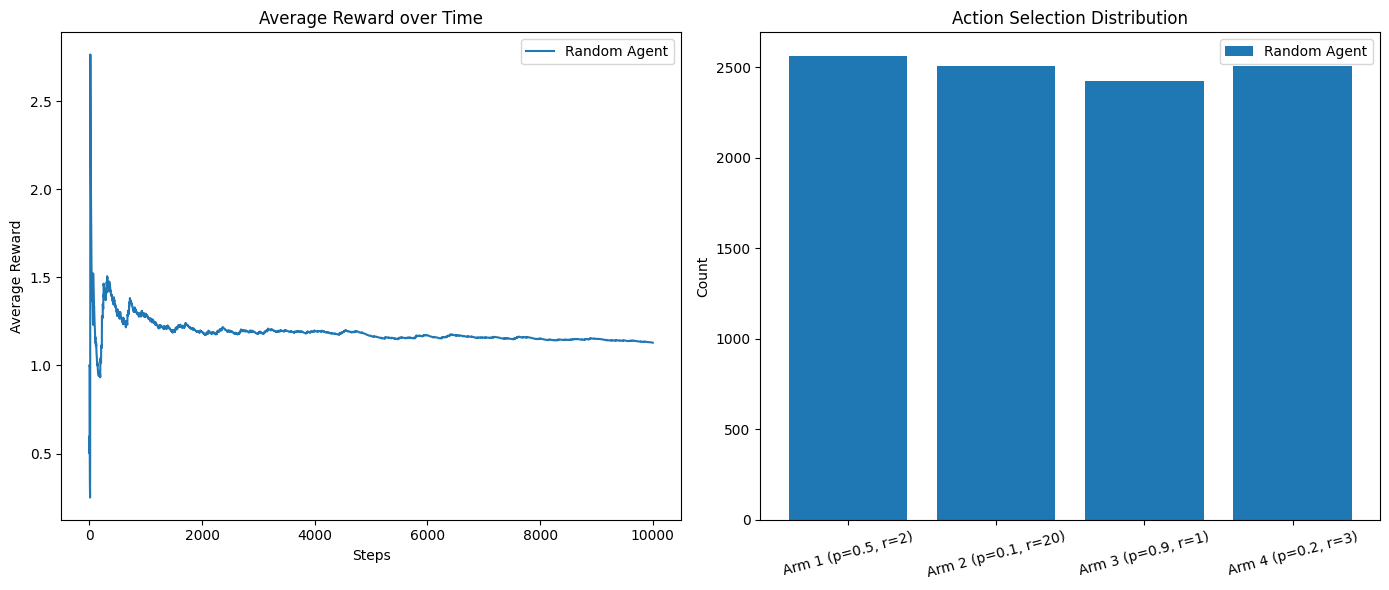

In [ ]:
import matplotlib.pyplot as plt


env = MultiArmedBanditEnv()
agent = RandomAgent()

mean_reward_random = []
rewards = []

while (agent.cache > 0) and (len(mean_reward_random) != 10000):
    act = agent.get_action()
    reward, done = env.step(act)
    agent.update_estimates(reward, act)
    rewards.append(reward)
    mean_reward_random.append(sum(rewards) / (len(rewards)))

print(f"Action counts: {agent.action_count}")
print(f"Reward estimates: {agent.reward_estimates}")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(mean_reward_random, label="Random Agent")
ax[0].set_title("Average Reward over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

actions = [
    "Arm 1 (p=0.5, r=2)",
    "Arm 2 (p=0.1, r=20)",
    "Arm 3 (p=0.9, r=1)",
    "Arm 4 (p=0.2, r=3)",
]
ax[1].bar(actions, agent.action_count, label="Random Agent")
ax[1].set_title("Action Selection Distribution")
ax[1].set_ylabel("Count")
plt.setp(ax[1].get_xticklabels(), rotation=15)
ax[1].legend()

plt.tight_layout()
plt.show()

### Жадная стратегия



Попробуем сделать реализацию жадным способом: на каждом шаге будем совершать действие, имеющее максимальную оценку, и, в зависимости от результата, будем обновлять эту оценку.

Давайте разберемся, что она представляет.

Оценить ценность того или иного действия можно по среднему выигрышу, к которому оно приведет.

Пусть $R_n$ — награда, полученная за выполнение $n$-го действия. Тогда оценкой ценности действия будет $Q_n=\dfrac{R_1+R_2+...+R_n}{n}$. Величина $Q_n$ по сути представляет собой простое скользящее среднее (_simple moving average_), которое может вычисляться постепенно:

$\large Q_n = \dfrac{1}{n}(R_n+(n-1)Q_{n-1}) = \dfrac{1}{n}(R_n+nQ_{n-1}-Q_{n-1}) = Q_{n-1}+\dfrac{1}{n}(R_n-Q_{n-1})$

В целом, подобная схема обновления параметров в обучении с подкреплением, представимая как

$\large \text{новая оценка} := \text{старая оценка} + \text{шаг}[\text{цель} - \text{старая оценка}]$,

встречается довольно часто и называется _incremental update rule_.

Для получения оценок действий жадным способом нам понадобится функция `argmax`, которая будет выбирать действие с наибольшей оценкой, а в случае равенства максимальной оценки будет выбирать случайное действие.

In [ ]:
def argmax(x):
    return np.random.choice(np.flatnonzero(x == x.max()))


class GreedyAgent:
    def __init__(self):
        """
        Our agent initializes reward estimates as zeros.
        This estimates will be updated incrementally after each
        interaction with the environment.
        """
        self.reward_estimates = np.zeros(4)
        self.action_count = np.zeros(4)
        self.cache = 1000  # initial amount of coins agent posesses

    def get_action(self):
        # Pay 1 coin for the action
        self.cache -= 1

        # Select greedy action
        action = argmax(self.reward_estimates)

        # Add a 1 to action selected in the action count
        self.action_count[action] += 1

        return action

    def update_estimates(self, reward, action):
        # Update amount of cache by reward from our previuos action
        self.cache += reward

        # Compute the difference between the received rewards vs the reward estimates
        error = reward - self.reward_estimates[action]

        # Update the reward estimate incementally
        n = self.action_count[action]
        self.reward_estimates[action] += (1 / n) * error

Action counts: [0.000e+00 0.000e+00 9.414e+03 3.000e+00]
Reward estimates: [0.        0.        0.8940939 0.       ]


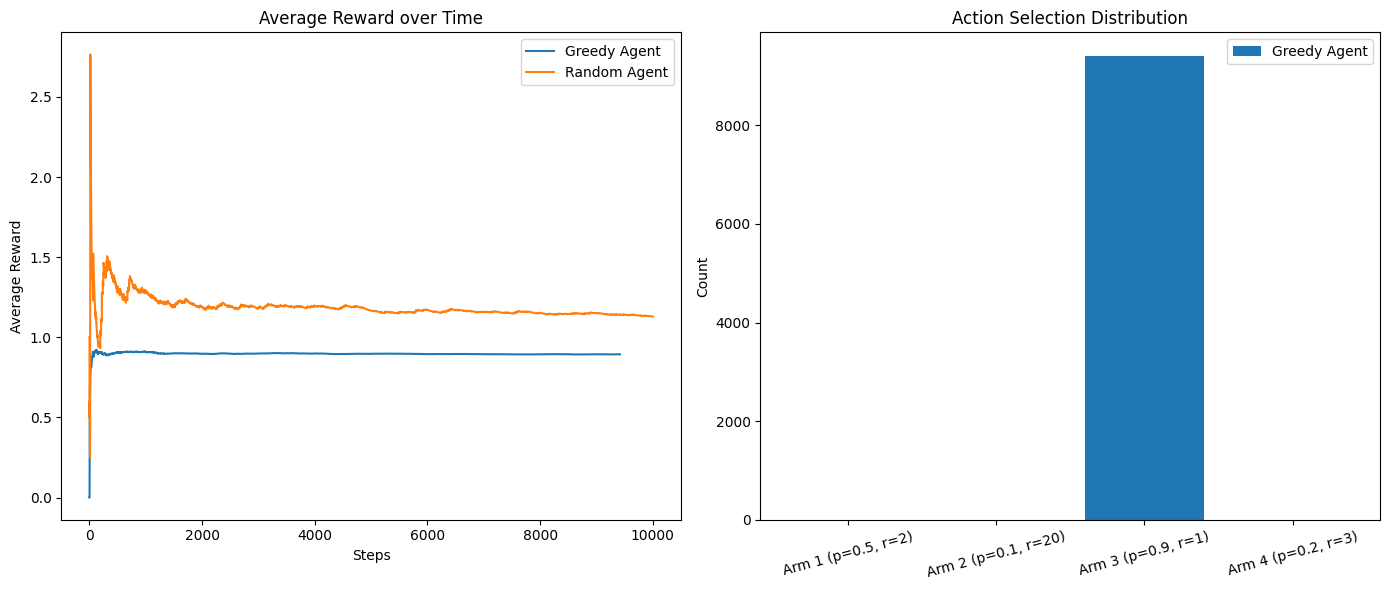

In [ ]:
import matplotlib.pyplot as plt


env = MultiArmedBanditEnv()
agent = GreedyAgent()

mean_reward_greedy = []
rewards = []

while (agent.cache > 0) and (len(mean_reward_greedy) != 10000):
    act = agent.get_action()
    reward, done = env.step(act)
    agent.update_estimates(reward, act)
    rewards.append(reward)
    mean_reward_greedy.append(sum(rewards) / (len(rewards)))

print(f"Action counts: {agent.action_count}")
print(f"Reward estimates: {agent.reward_estimates}")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(mean_reward_greedy, label="Greedy Agent")
ax[0].plot(mean_reward_random, label="Random Agent")
ax[0].set_title("Average Reward over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

actions = [
    "Arm 1 (p=0.5, r=2)",
    "Arm 2 (p=0.1, r=20)",
    "Arm 3 (p=0.9, r=1)",
    "Arm 4 (p=0.2, r=3)",
]
ax[1].bar(actions, agent.action_count, label="Greedy Agent")
ax[1].set_title("Action Selection Distribution")
ax[1].set_ylabel("Count")
plt.setp(ax[1].get_xticklabels(), rotation=15)
ax[1].legend()

plt.tight_layout()
plt.show()

В жадной стратегии выбор действия детерминирован. Агент всегда выбирает действие с наивысшей оценкой, что означает отсутствие распределения вероятностей для действий.

### $ε$-жадная стратегия

Видно, что жадная стратегия не позволяет нам добиться оптимального принятия решений, поскольку оптимальную стратегию легко пропустить, если в начале агенту не повезет.

Вместо жадной стратегии будем использовать $\varepsilon$-жадную стратегию, которую можно описать как "оптимизм при неопределенности". Суть $\varepsilon$-жадной стратегии заключается в следующем: с некоторой вероятностью $\varepsilon$ совершать случайное действие, а с вероятностью $1-\varepsilon$ вести себя жадно.

$\varepsilon$ — важный параметр алгоритма. Как правило, в начале используют большие значения $\varepsilon$, тогда агент действует почти случайно и "исследует мир", а затем их уменьшают, и действия агента становятся близкими к оптимальным.

Выбор величины $\varepsilon$ связан с так называемым __exploration-exploitation trade-off__. Он может быть легко проиллюстрирован примером, когда вы не можете решить, пойти ли сегодня в любимый ресторан или попробовать сходить в новый? Новый ресторан может оказаться лучшего привычного, но это решение связано с риском разочарования.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/exploration_vs_exploitation.png" alt="Drawing" width="600"/></center>

In [ ]:
class EpsilonGreedyAgent(GreedyAgent):
    def __init__(self, epsilon):
        GreedyAgent.__init__(self)
        # Store the epsilon value
        assert epsilon >= 0 and epsilon <= 1
        self.epsilon = epsilon

    def get_action(self):
        # We need to redefine this function so that it takes an exploratory action with epsilon probability

        # Pay 1 coin for the action
        self.cache -= 1
        # One hot encoding: 0 if exploratory, 1 otherwise
        action_type = int(np.random.random() > self.epsilon)
        # Generate both types of actions for every experiment
        exploratory_action = np.random.randint(4)
        greedy_action = argmax(self.reward_estimates)
        # Use the one hot encoding to mask the actions for each experiment
        action = greedy_action * action_type + exploratory_action * (1 - action_type)

        self.action_count[action] += 1

        return action

Action counts: [ 186. 9560.  184.   70.]
Reward estimates: [1.01075269 1.96025105 0.90217391 0.42857143]


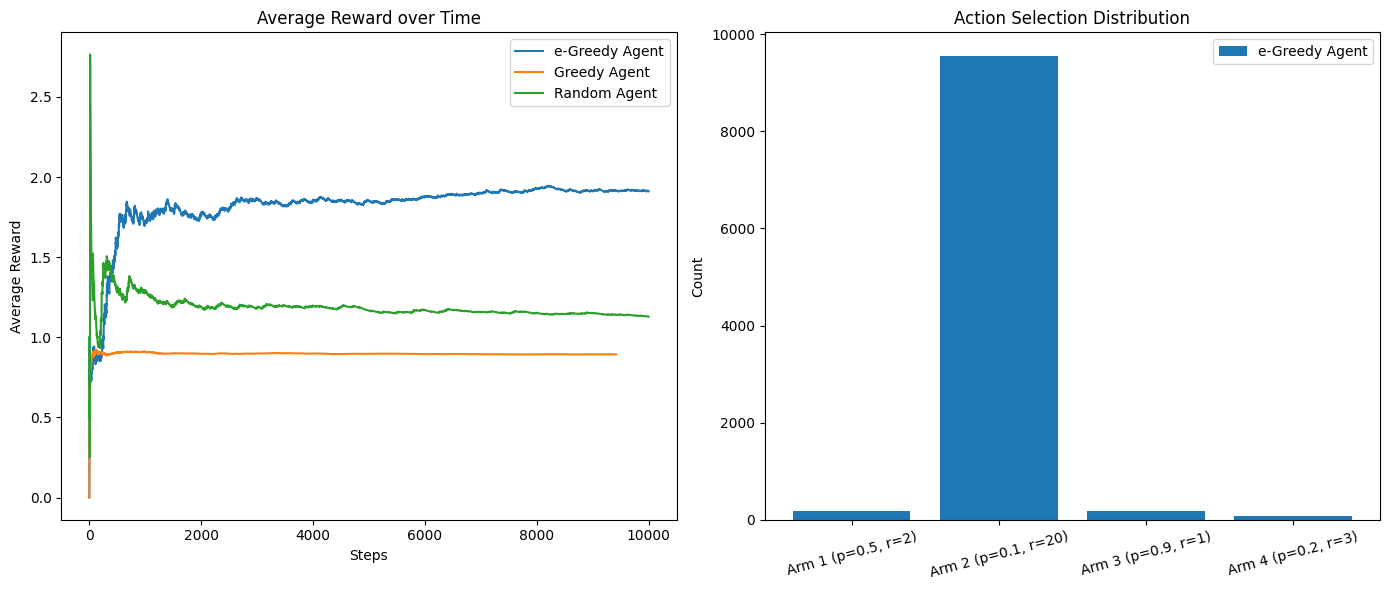

In [ ]:
agent = EpsilonGreedyAgent(epsilon=0.25)

mean_reward_e_greedy = []
rewards = []

while (agent.cache > 0) and (len(mean_reward_e_greedy) != 10000):
    act = agent.get_action()
    reward, done = env.step(act)
    agent.update_estimates(reward, act)
    rewards.append(reward)
    mean_reward_e_greedy.append(sum(rewards) / len(rewards))
    # Decrease epsilon with time until we reach 0.01 chanse to perform exploratory action
    if agent.epsilon > 0.01:
        agent.epsilon -= 0.0001

print(f"Action counts: {agent.action_count}")
print(f"Reward estimates: {agent.reward_estimates}")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(mean_reward_e_greedy, label="e-Greedy Agent")
ax[0].plot(mean_reward_greedy, label="Greedy Agent")
ax[0].plot(mean_reward_random, label="Random Agent")
ax[0].set_title("Average Reward over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

actions = [
    "Arm 1 (p=0.5, r=2)",
    "Arm 2 (p=0.1, r=20)",
    "Arm 3 (p=0.9, r=1)",
    "Arm 4 (p=0.2, r=3)",
]
ax[1].bar(actions, agent.action_count, label="e-Greedy Agent")
ax[1].set_title("Action Selection Distribution")
ax[1].set_ylabel("Count")
plt.setp(ax[1].get_xticklabels(), rotation=15)
ax[1].legend()

plt.tight_layout()
plt.show()

В $ε$-жадной стратегии агент действует жадно большую часть времени, но с вероятностью $ε$ выбирает действие случайно, что добавляет элемент случайности и частичное распределение вероятностей, но только в те моменты, когда срабатывает $ε$.

### Softmax-стратегия

Использование $ε$-жадной стратегии позволило нам иногда совершать "разведывательные" решения, которые могли быть не оптимальны относительно буквальной интерпретации накопленного нами ранее опыта. Аналогичного эффекта мы бы могли достигнуть, если бы определили нашу стратегию принятия решения вероятностной.

Пусть мы находимся в состоянии $s$, для которого возможны $K$ действий $\{a_i\}$. Определим величину $\pi(a_i|s)$:
- $\pi(a_i| s)$ — вероятность принять решение $a_i$, если агент находится в состоянии $s$.

Данное распределение вероятности принято называть **политикой (policy)**.

Для "игры" с использованием такой политики нам нужно:
1. Вычислить распределение вероятности $\pi(a_i| s)$.
2. Сгенерировать случайное решение $a$, удовлетворяющее данному распределению: $a \sim \pi(a_i| s)$.

In [ ]:
from numpy.random import choice
from scipy.special import softmax


class SoftmaxAgent(GreedyAgent):
    def __init__(self):
        GreedyAgent.__init__(self)

    def get_action(self):
        # We need to redefine this function so that it takes an action with probability pi(a,s)

        # Pay 1 coin for the action
        self.cache -= 1

        # Get \pi(a_i|s):
        pi = softmax(self.reward_estimates)
        # Sample action
        action = choice(np.arange(0, 4, 1), 1, p=pi)[0]

        self.action_count[action] += 1

        return action

Action counts: [1841. 5056. 1807. 1296.]
Reward estimates: [1.00706138 2.07674051 0.90426121 0.64814815]


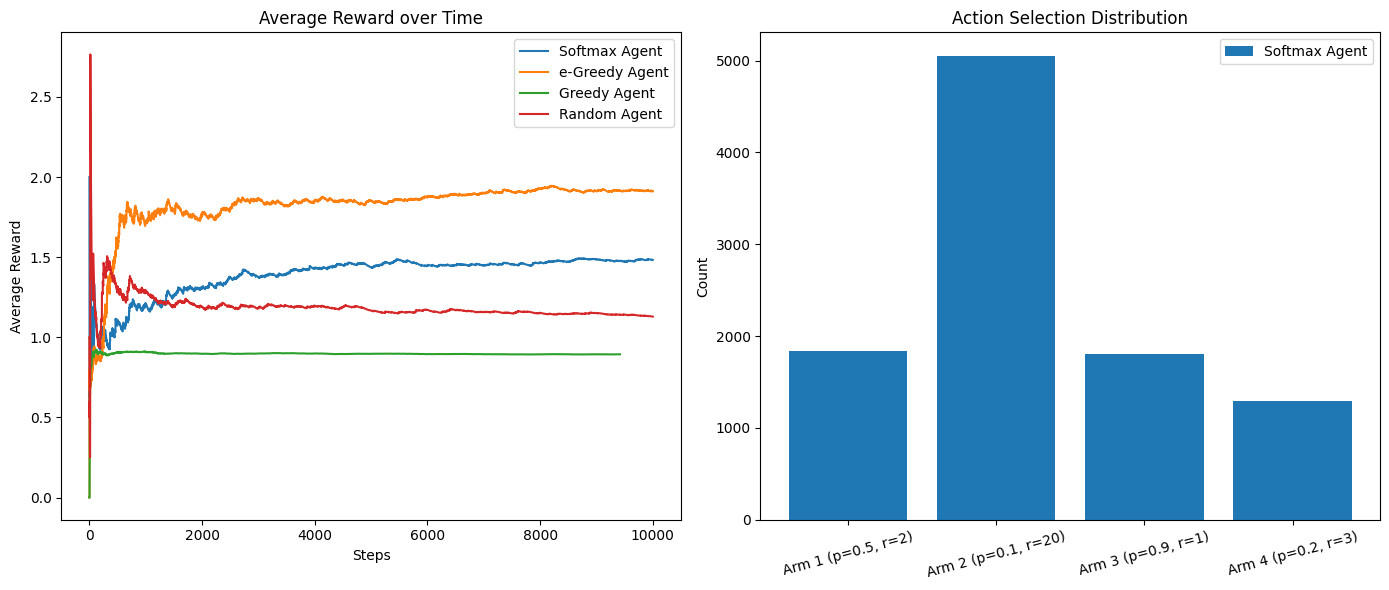

In [ ]:
agent = SoftmaxAgent()

mean_reward_softmax_agent = []
rewards = []

while (agent.cache > 0) and (len(mean_reward_softmax_agent) != 10000):
    act = agent.get_action()
    reward, done = env.step(act)
    agent.update_estimates(reward, act)
    rewards.append(reward)
    mean_reward_softmax_agent.append(sum(rewards) / len(rewards))

clear_output()

print(f"Action counts: {agent.action_count}")
print(f"Reward estimates: {agent.reward_estimates}")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(mean_reward_softmax_agent, label="Softmax Agent")
ax[0].plot(mean_reward_e_greedy, label="e-Greedy Agent")
ax[0].plot(mean_reward_greedy, label="Greedy Agent")
ax[0].plot(mean_reward_random, label="Random Agent")
ax[0].set_title("Average Reward over Time")
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Average Reward")
ax[0].legend()

actions = [
    "Arm 1 (p=0.5, r=2)",
    "Arm 2 (p=0.1, r=20)",
    "Arm 3 (p=0.9, r=1)",
    "Arm 4 (p=0.2, r=3)",
]
ax[1].bar(actions, agent.action_count, label="Softmax Agent")
ax[1].set_title("Action Selection Distribution")
ax[1].set_ylabel("Count")
plt.setp(ax[1].get_xticklabels(), rotation=15)
ax[1].legend()
plt.tight_layout()
plt.show()

В softmax-стратегии  агент всегда выбирает действие на основе распределения вероятностей, которое пропорционально экспонентам оценок вознаграждений. Это означает, что действия всегда семплируются из распределения вероятностей, что обеспечивает баланс между исследованием и использованием.

# Мета-эвристики в обучении с подкреплением

Мета-эвристики представляют собой обобщенные алгоритмы для поиска решений в сложных оптимизационных задачах, где мы не можем использовать градиентные методы оптимизации.

Мы рассматриваем их как решение задачи black-box оптимизации. Мы можем поместить агента в среду, реализовать выбранную стратегию, оценить результат и сделать вывод о том, хорошую стратегию мы подобрали или нет.

Задача алгоритма оптимизации состоит в том, чтобы на основе лишь этой информации предлагать, какие стратегии следует попробовать следующими. Рассмотрим один из таких подходов.

## Cross-entropy method (CEM)


Кросс-энтропийный метод (CEM) — это мета-эвристический алгоритм оптимизации, который используется для поиска оптимальных решений путем итеративного улучшения выборки решений. Он включает следующие шаги:

1. **Инициализация распределения:**
   - Начните с инициализации параметров вероятностного распределения $( P(\theta)$), например, нормального распределения с некоторыми начальными средними и дисперсиями.

2. **Генерация выборки:**
   - Сгенерируйте выборку кандидатов $( \{\theta_1, \theta_2, ..., \theta_N\} $) из текущего распределения $( P(\theta) $).

3. **Оценка кандидатов:**
   - Для каждого кандидата $( \theta_i $) оцените его качество или производительность с помощью функции награды $( S(\theta_i) $).

4. **Отбор лучших кандидатов:**
   - Отберите некоторое количество $( k $) лучших кандидатов из выборки на основе их оценок. Эти лучшие кандидаты составляют элитный набор.

5. **Обновление распределения:**
   - Обновите параметры распределения $( P(\theta) $) на основе элитного набора. Например, если распределение является нормальным, обновите его средние и дисперсии, используя значения элитных кандидатов.

6. **Проверка условия остановки:**
   - Проверьте, выполнено ли условие остановки (например, достижение определенного уровня производительности или истечение максимального числа итераций). Если да, завершите алгоритм. Если нет, вернитесь к шагу 2. В конце алгоритма выберите лучшие параметры $( \theta $), найденные в процессе итераций, как решение оптимизационной задачи.


<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/schematic_view_cross_entropy.png" alt="Drawing" width="800"/></center>

## Пример CEM в Gym

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Воспользуемся готовой средой [MountainCarContinuous 🛠️[doc]](https://mgoulao.github.io/gym-docs/environments/classic_control/mountain_car_continuous/):

<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/mountain-car-v0.gif">

In [ ]:
import gym
from IPython.display import clear_output

env = gym.make("MountainCarContinuous-v0")
env.seed(42)
clear_output()

print("observation space:", env.observation_space)
print("action space:", env.action_space)
print("  - low:", env.action_space.low)
print("  - high:", env.action_space.high)

observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
action space: Box(-1.0, 1.0, (1,), float32)
  - low: [-1.]
  - high: [1.]


Создадим агента:

In [ ]:
import math
import torch.nn as nn
import torch.nn.functional as F


class Agent(nn.Module):
    def __init__(self, env, h_size=16):
        super(Agent, self).__init__()
        self.env = env
        # State, hidden layer, action sizes
        self.s_size = env.observation_space.shape[0]
        self.h_size = h_size
        self.a_size = env.action_space.shape[0]
        # Define layers (we used 2 layers)
        self.fc1 = nn.Linear(self.s_size, self.h_size)
        self.fc2 = nn.Linear(self.h_size, self.a_size)

    def set_weights(self, weights):
        s_size = self.s_size
        h_size = self.h_size
        a_size = self.a_size
        # Separate the weights for each layer
        fc1_end = (s_size * h_size) + h_size
        fc1_W = torch.from_numpy(weights[: s_size * h_size].reshape(s_size, h_size))
        fc1_b = torch.from_numpy(weights[s_size * h_size : fc1_end])
        fc2_W = torch.from_numpy(
            weights[fc1_end : fc1_end + (h_size * a_size)].reshape(h_size, a_size)
        )
        fc2_b = torch.from_numpy(weights[fc1_end + (h_size * a_size) :])
        # Set the weights for each layer
        self.fc1.weight.data.copy_(fc1_W.view_as(self.fc1.weight.data))
        self.fc1.bias.data.copy_(fc1_b.view_as(self.fc1.bias.data))
        self.fc2.weight.data.copy_(fc2_W.view_as(self.fc2.weight.data))
        self.fc2.bias.data.copy_(fc2_b.view_as(self.fc2.bias.data))

    def get_weights_dim(self):
        return (self.s_size + 1) * self.h_size + (self.h_size + 1) * self.a_size

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x.cpu().data

    def act(self, state):
        state = torch.from_numpy(state).float().to(device)
        with torch.no_grad():
            action = self.forward(state)
        return action

    def evaluate(self, weights, gamma=1.0, max_t=5000):
        self.set_weights(weights)
        episode_return = 0.0
        state = self.env.reset()
        for t in range(max_t):
            state = torch.from_numpy(state).float().to(device)
            action = self.forward(state)
            state, reward, done, _ = self.env.step(action)
            episode_return += reward * math.pow(gamma, t)
            if done:
                break
        return episode_return

clear_output()

Реализуем Cross-Entropy Method:

In [ ]:
import numpy as np
from collections import deque
from tqdm.notebook import tqdm


np.random.seed(42)


def cem(
    agent,
    n_iterations=5,
    max_t=1000,
    gamma=1.0,
    print_every=10,
    pop_size=50,
    elite_frac=0.2,
    sigma=0.5,
):
    """PyTorch implementation of the cross-entropy method.

    Params
    ======
        Agent (object): agent instance
        n_iterations (int): maximum number of training iterations
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        pop_size (int): size of population at each iteration
        elite_frac (float): percentage of top performers to use in update
        sigma (float): standard deviation of additive noise
    """
    n_elite = int(pop_size * elite_frac)

    scores_deque = deque(maxlen=100)
    scores = []
    # Initialize the weight with random noise
    best_weight = sigma * np.random.randn(agent.get_weights_dim())

    for i_iteration in tqdm(range(1, n_iterations + 1)):
        # Define the cadidates and get the reward of each candidate
        weights_pop = [
            best_weight + (sigma * np.random.randn(agent.get_weights_dim()))
            for i in range(pop_size)
        ]
        rewards = np.array(
            [agent.evaluate(weights, gamma, max_t) for weights in weights_pop]
        )

        # Select best candidates from collected rewards
        elite_idxs = rewards.argsort()[-n_elite:]
        elite_weights = [weights_pop[i] for i in elite_idxs]
        best_weight = np.array(elite_weights).mean(axis=0)

        reward = agent.evaluate(best_weight, gamma=1.0)
        scores_deque.append(reward)
        scores.append(reward)

        torch.save(agent.state_dict(), "checkpoint.pth")

        if i_iteration % print_every == 0:
            print(
                "Episode {}\tAverage Score: {:.2f}".format(
                    i_iteration, np.mean(scores_deque)
                )
            )

        if np.mean(scores_deque) >= 90.0:
            print(
                "\nEnvironment solved in {:d} iterations!\tAverage Score: {:.2f}".format(
                    i_iteration - 100, np.mean(scores_deque)
                )
            )
            break
    return scores

In [ ]:
np.bool8 = np.bool_
agent = Agent(env).to(device)
scores = cem(agent)

  0%|          | 0/5 [00:00<?, ?it/s]

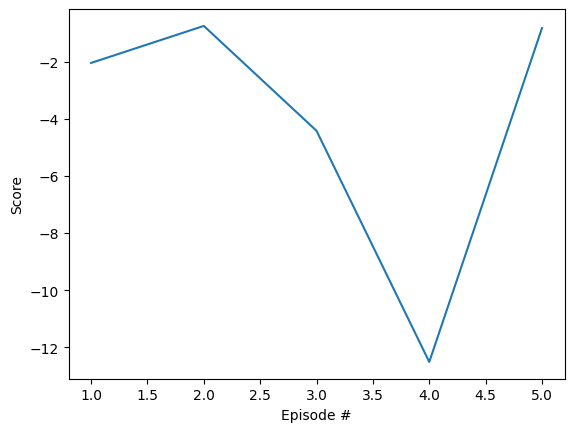

In [ ]:
import matplotlib.pyplot as plt

# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

In [ ]:
!mkdir -p video

In [ ]:
import glob
import base64, io
from IPython import display
from IPython.display import HTML
from gym.wrappers.monitoring import video_recorder


def show_video(env_name):
    mp4list = glob.glob("video/*.mp4")
    if len(mp4list) > 0:
        mp4 = "video/{}.mp4".format(env_name)
        video = io.open(mp4, "r+b").read()
        encoded = base64.b64encode(video)
        display.display(
            HTML(
                data="""<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>""".format(
                    encoded.decode("ascii")
                )
            )
        )
    else:
        print("Could not find video")


def show_video_of_model(agent, env_name):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    agent.load_state_dict(torch.load("checkpoint.pth"))
    state = env.reset()
    done = False
    while not done:
        vid.capture_frame()

        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break
    env.close()

In [ ]:
agent = Agent(env).to(device)
show_video_of_model(agent, "MountainCarContinuous-v0")
clear_output()

In [ ]:
clear_output()
print("Необученная модель:")
show_video("MountainCarContinuous-v0")

Необученная модель:


Загрузим веса обученной в течение 500 эпизодов модели:

In [ ]:
!wget -qN https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/weights/checkpoint.pth

In [ ]:
agent = Agent(env).to(device)
show_video_of_model(agent, "MountainCarContinuous-v0")
clear_output()

In [ ]:
clear_output()
print("Обученная модель:")
show_video("MountainCarContinuous-v0")

Обученная модель:


# Марковский процесс принятия решений (Markov decision process, MDP)

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/mdp.png" width="600">

<center><em> Марковский процесс принятия решений<em><center>

## Markov property

Итак, мы разобрались с самой простой ситуацией, многорукими бандитами, в которой среда постоянно находится в одном и том же состоянии. Однако в реальности чаще всего состояние среды, из которой агент делает новый ход, будет изменяться. Например, при игре в шахматы агент должен учитывать то, что после его хода и хода оппонента позиция на доске изменится.

Нам нужно определить некий процесс, в котором агент последовательно переходит из состояния в состояние в зависимости от своих действий, в некоторых состояниях получая награды.

Сделаем также важное предположение о природе нашего процесса: **он полностью описывается своим текущим состоянием**. Все, что произойдет в будущем, не зависит от информации из прошлого, кроме той, что мы уже наблюдаем в настоящем. Такой процесс называется __марковским__. Заметим, что описанный нами процесс в примере с многорукими бандитами также является марковским.

Приведем другие классические примеры марковского процесса:

1. Игральный кубик. Мы знаем, что на нем выпадет любая из граней с некоторой фиксированной вероятностью. На это никак не влияет то, что до этого на кубике выпало 6 шестерок подряд. Это может повлиять на нашу оценку вероятностей выпадения той или иной грани, но не на реальную вероятность.

2. Шахматы. "Текущая позиция на доске + чей ход" однозначно описывают игру.

Однако, несмотря на это свойство, мы сами можем регулировать описание текущего состояния. Например, включив больше информации в определение текущего состояния, мы можем обеспечить соответствие процесса марковскому свойству, даже если изначально это не было так. Таким образом, правильное определение и описание текущего состояния играют ключевую роль.

### Определение Markov Property

Состояние $S_{t}$ является Марковским тогда и только тогда, когда:
$$ \large
p\left(r_{t}, s_{t+1} \mid s_{0}, a_{0}, r_{0}, \ldots, s_{t}, a_{t}\right)=p\left(r_{t}, s_{t+1} \mid s_{t}, a_{t}\right)
$$



Марковский процесс описывает **полностью наблюдаемые (fully observable)** среды. Можно описать их так:

- Что происходит в будущем, зависит только от текущего состояния.
- Информации, которую получает агент в момент времени $t$, достаточно, чтобы принять оптимальное решение для момента времени $t$.
- Состояние среды — достаточная статистика для принятия решения.
- Вероятность перехода в новое состояние зависит только от текущего состояния и текущего действия.



## Markov process

Представим себе, что студент живет вот по такой схеме. Заметим, что влиять в такой схеме на свои решения он не может: все решается подкидыванием кубика.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/markov_process.png" width="1000">

Марковский процесс (цепь) — это кортеж $(S, P)$, где
- $S$ — принимает дискретные (конечные) значения,
- $P$ — матрица переходов (transition matrix):
$$\large
P_{s s^{\prime}}=P\left(S_{t+1}=s^{\prime} \mid S_{t}=s\right),
$$

где $P\left(S_{t+1}=s^{\prime} \mid S_{t}=s\right)$ — элемент матрицы перехода $P_{ss'}$ — условная вероятность оказаться в следующий момент времени в состоянии $s'$, если в текущий момент времени среда находилась в состоянии $s$.

Строго говоря, необходимо еще распределение начальных состояний, но мы предполагаем, что оно вырождено, т.е. мы знаем, где начинаем, с вероятностью 1.

Марковский процесс — основа для RL. Мы будем постепенно усложнять эту модель, добавляя rewards и actions.

### Функция награды (reward)

Наши состояния, очевидно, неравноценны. Давайте к каждому состоянию привяжем награду $R_s$. Награды могут быть положительными, нулевыми или отрицательными и назначаться в различных временных точках, что определяет, как агент учится и принимает решения.

* **Положительные награды** — сигнализируют агенту о желательных действиях или достижении определенных целей. Они способствуют усилению тех действий, которые привели к получению этой награды.

* **Нулевые награды** — сигнализируют агенту, что его действия не привели к каким-либо значимым результатам. Такие награды часто используются для поддержания текущего состояния или для действий, которые не оказывают непосредственного влияния на итоговый результат.

* **Отрицательные награды** или штрафы — используются для того, чтобы агент избегал нежелательных действий или состояний. Они помогают корректировать поведение агента, указывая на ошибки или неэффективные действия.



Награды могут назначаться в различных временных точках:

* **Награды в конце эпизода.** В некоторых задачах награды назначаются только в конце эпизода, когда достигается конечное состояние или завершается определенная последовательность действий.
Пример: в шахматах агент получает награду только в конце игры, когда определяются победитель и проигравший или фиксируется ничья. Все промежуточные действия могут не вознаграждаться отдельно, но влияют на итоговый результат.

* **Награды на каждом шаге времени ($t$).** В других задачах награды могут назначаться на каждом шаге времени, чтобы агент получал обратную связь после каждого действия.
Пример: в задаче управления дроном агент получает награды на каждом шаге времени за удержание стабильной высоты, избегание препятствий и достижение определенных целей. Эти награды помогают агенту корректировать свое поведение в реальном времени.

Дизайн функции награды — это отдельная нетривиальная задача, которая зависит от многих факторов.

Схема для студента в этом случае модифицируется следующим образом. Заметьте, награды тут расставляются с точки зрения актора — студента:

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/markov_reward.png" width="600"></center>

### Марковский процесс принятия решений



До этого у нас получалось не совсем адекватное представление процесса — студент не мог ни на что повлиять. На самом же деле студент может решать, куда ему надо: в аудиторию, домой спать или в бар. Однако наше действие не всегда определяет состояние, в которое мы перейдем.

Хочет наш студент пойти на лекцию, но по пути встречает товарища, и идут они в бар. Хочет он пойти спать, а по пути к выходу из университета встречает лектора с хорошей памятью и идет на лекцию.

Как это отразить на схеме так, чтобы это можно было прочитать? Введем промежуточные состояния, куда нас переводят действия студента. А уже из этих промежуточных состояний случайно будем переходить в состояния среды.

Процесс, когда в среде агент выбирает действия, называют Markov decision process (MDP).

### Формальное описание MDP

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/markov_decision_process_return_random.png" width="800"/>

MDP — это кортеж $(S, A, R, P, \gamma)$, где:
- $S$ — состояния (дискретное пространство),
- $A$ — действия (дискретное пространство),
- $R$ — функция reward: $R_{s,s'}^{a}$ (мгновенное вознаграждение за переход из состояния $s$ в $s'$ при выборе действия $a$),
- $P$ — матрица переходов (transition matrix): $P_{s s^{\prime}}^{a}=P\left(S_{t+1}=s^{\prime} \mid S_{t}=s, A_{t}=a\right)$,
- $\gamma$ — коэффициент дисконтирования.

#### $\gamma$ — коэффициент дисконтирования

Цель агента заключается в том, чтобы найти стратегию, максимизирующую среднюю суммарную награду:

$$\text{Return} = \sum_i {R_i}$$

Суммарная награда — это просто сумма всех наград, которые агент получает за последовательность действий от начального до конечного состояния.


Использование суммарной награды имеет несколько важных недостатков:

1. **Отсроченные награды.** Действия, сделанные сейчас, влияют на события не на следующем шаге, а через несколько шагов вперед. Определение того, какое действие привело к награде через неопределенное количество шагов, сильно усложняет задачу. Если действий много, то и сопоставить действие с наградой затруднительно.

2. **Бесконечные циклы.** В нашей задаче могут быть бесконечно большие награды, поэтому нам важно понимать, как можно было бы их сравнить.

3. **Стабильность обучения.** Без учета временного аспекта агент может переоценивать будущие награды, что приводит к нестабильному и неоптимальному поведению.

Поэтому при оценке кумулятивной награды на шаге $t$ $(G_t)$ используется коэффициент дисконтирования $\gamma$, который показывает, насколько ценными являются будущие награды на текущий момент (см. [Markov Decision Processes (David Silver Lectures) 📚[book]](https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf)):

$$\large G_t = R_{t+1} + \gamma R_{t+2} + ... =\sum^{\infty}_{k=0} \gamma ^ kR_{t+k+1},
$$

где:
- $R_{t+1}, R_{t+2}, \dots$ — вознаграждения по рёбрам переходов,
- дисконтирование $\gamma \in[0,1]$ — это текущая стоимость будущих вознаграждений,
- $\gamma^{k}R_{t+k+1}$ — ценность получения награды $R$ после $k+1$ шагов.

При этом:
- немедленное вознаграждение ценится выше отложенного вознаграждения,
- $\gamma$ близко к 0 приводит к «близорукости»,
- $\gamma$ близко к 1 приводит к «дальновидной» оценке.

* **Снижение влияния неопределенности будущего.**
В реальных задачах будущее часто неопределенно. Дисконтирование уменьшает влияние этой неопределенности, так как делает дальнейшие награды менее значимыми для текущего состояния и действия.

* **Стабильность обучения.**
Дисконтирование помогает стабилизировать процесс обучения, так как уменьшает влияние долгосрочных и часто неопределенных наград на текущие решения. Это упрощает оптимизацию стратегии агента.

* **Баланс между краткосрочными и долгосрочными целями.**
Использование коэффициента дисконтирования позволяет агенту находить баланс между краткосрочными выгодами и долгосрочными целями, что способствует более стратегическому поведению.

* **Предотвращение бесконечного накопления наград.**
В средах, где награды могут накапливаться бесконечно, дисконтирование предотвращает ситуацию, когда агент стремится к достижению бесконечных будущих наград.

Какое значение $\gamma$ выбрать?

**Можно ли его выбрать равным 1?**

Да, получим суммарную награду.

**Можно ли его выбрать равным 0?**

Тоже да. В этом случае у нас получится "жадный" алгоритм: мы всегда выбираем решение, которое дает максимальную награду сейчас, нас не волнуют будущие награды.


Обычно $\gamma$ ставят равной чему-то между двумя этими крайностями: $0 \le \gamma \le 1$.

Близость $\gamma$ к 0 отражает нашу "нетерпеливость" — насколько важно получить награду именно сейчас.

Наличие такого $\gamma$ позволяет нам не делать различия между моделями с ограниченным числом шагов и неограниченным: теперь в любом случае return будет конечным числом, т.к. выражение для return ограничено сверху суммой бесконечно убывающей геометрической прогрессии.

Пусть $R_{\max} = \max R_i$ — максимальная награда, которую мы в принципе можем получить в каком-то состоянии.

$G_t = R_{t+1} + \gamma \cdot R_{t+2} + \gamma^2 \cdot R_{t+3} + ... \le R_{\max} + \gamma \cdot R_{\max} + \gamma^2 \cdot R_{\max} + ... = R_{\max} (1 + \gamma + \gamma^2 + ... ) \le R_{\max} \cdot \dfrac{1}{1-\gamma} = \text{const}$

**Discounting makes sums finite**

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/discounting_makes_sums_finite.png" alt="Drawing" width="800"/>

\begin{equation}
G_{0}=\sum_{k=0}^{\infty} \gamma^{k}=\frac{1}{1-\gamma}
\end{equation}

Важно понимать, что выбор $\gamma$ меняет задачу, которую мы решаем, и, соответственно, меняет решение.

Создадим наш MDP в виде среды:

In [ ]:
from IPython.display import clear_output


# After this setup we can import mdp package
# Source: https://github.com/yandexdataschool/Practical_RL/blob/master/setup_colab.sh
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/setup_colab.sh -O- | bash
# Source: https://github.com/yandexdataschool/Practical_RL/blob/master/week02_value_based/mdp.py
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/mdp.py
!touch .setup_complete

clear_output()

In [ ]:
from mdp import MDP

transition_probs = {
    "s0": {"a0": {"s1": 1}},
    "s1": {
        "a0": {"s4": 1},
        "a1": {"s2": 0.6, "s4": 0.2, "s3": 0.2},
        "a2": {"s2": 0.1, "s3": 0.9},
    },
    "s2": {"a0": {"s4": 0.2, "s3": 0.8}},
    "s3": {"a0": {"s4": 1}},
    "s4": {"a0": {"s4": 1}},
}
rewards = {
    "s0": {"a0": {"s1": -2}},
    "s1": {
        "a0": {"s4": 0},
        "a1": {"s2": -4, "s4": 0, "s3": 10},
        "a2": {"s2": -4, "s3": 10},
    },
    "s2": {"a0": {"s4": 0, "s3": 10}},
}

mdp = MDP(transition_probs, rewards, initial_state="s0")

# We can now use MDP just as any other gym environment:
print("initial state =", mdp.reset())
next_state, reward, done, info = mdp.step("a0")
print("next_state = %s, reward = %s, done = %s" % (next_state, reward, done))

initial state = s0
next_state = s1, reward = -2, done = False


In [ ]:
clear_output()

# MDP methods
print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions('s1') = ", mdp.get_possible_actions("s1"))
print("mdp.get_next_states('s1', 'a0') = ", mdp.get_next_states("s1", "a0"))

# state, action, next_state
print("mdp.get_reward('s1', 'a0', 's0') = ", mdp.get_reward("s1", "a0", "s0"))

# get_transition_prob(self, state, action, next_state)
print(
    "mdp.get_transition_prob('s1', 'a1', 's2') = ",
    mdp.get_transition_prob("s1", "a1", "s2"),
)

mdp.get_all_states = ('s0', 's1', 's2', 's3', 's4')
mdp.get_possible_actions('s1') =  ('a0', 'a1', 'a2')
mdp.get_next_states('s1', 'a0') =  {'s4': 1}
mdp.get_reward('s1', 'a0', 's0') =  0.0
mdp.get_transition_prob('s1', 'a1', 's2') =  0.6


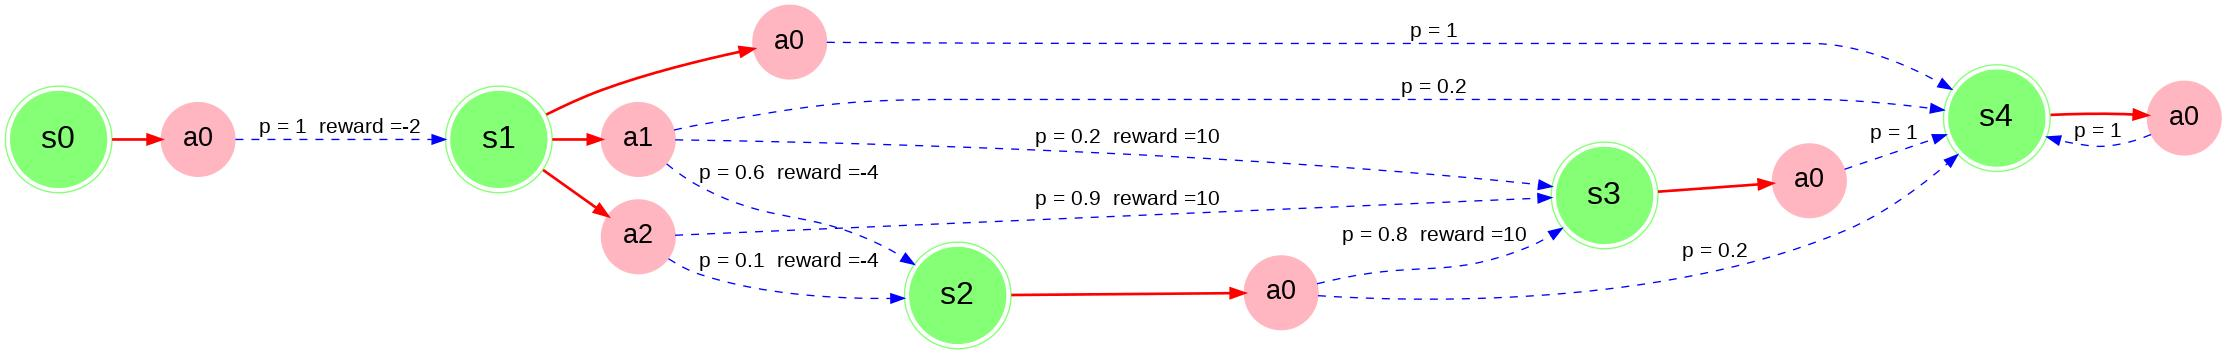

In [ ]:
import mdp as MDP
from IPython.display import display_jpeg

display_jpeg(MDP.plot_graph(mdp))

## Проблема поиска оптимальной политики

Нужно найти последовательность переходов, которой будет соответствовать максимальная награда ($G_t$).

Политика (policy) $\pi$ — это функция, которая для текущего состояния $s$ дает распределение вероятностей на множестве действий $A$.

$$ \large
\pi(a|s)=\mathbb{P}\left[A_{t}=a \mid S_{t}=s\right]
$$
- Политика полностью определяет поведение агента.
- Политики MDP зависят от текущего состояния среды (а не от прошлых состояний).
- Т. е. политики являются стационарными (не зависящими от времени):

$$ \large
A_{t} \sim \pi\left(\cdot \mid S_{t}\right), \forall t>0
$$

Для нашего примера со студентом:


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/markov_policy_example.png" alt="Drawing" width="800"/>

#### State-value function $v_{\pi}(s)$ (V-функция)

* $v_\pi(s)$ — измеряет ценность каждого состояния, а именно какое ожидаемое вознаграждение можно получить, если начать двигаться из состояния $s$ в течение всего оставшегося времени, придерживаясь политики $\pi$.

Так, например, агент может следовать политике, заключающейся в переходе между состояниями с высокой ценностью. Однако функция ценности состояния удалена от принятия решений агентом, поскольку агент зачастую не может сам выбрать следующее состояние, в которое перейдет, поскольку на него будет оказываться влияние случайности (например, броски кубиков) или внешних сил (ход оппонента). Поэтому при выборе оптимальной политики рассматривают ценность не состояний, а действий.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/chess.png" width="400"/></center>


Формально **V-функция** $v_\pi(s)$ **вводится в качестве математического ожидания** (по политике $\pi$ и по MDP среды $P_{s s^{\prime}}^{a}$) от будущей дисконтированной награды $G_t$ в случае, если мы начинаем свои действия в состоянии среды $s$ и будем действовать строго согласно нашей политики $\pi$:

$$\large
\begin{equation}
\begin{aligned}
v_{\pi}(s) &=\mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s\right]
\end{aligned}
\end{equation}$$

#### Action-value function $q_{\pi}(s, a)$ (Q-функция)

* $q_\pi(s,a)$ — аналогично функции ценности состояния, но при условии, что в состоянии $s (s_0 = s)$ было выбрано действие $a$ (мы фиксируем действие). То есть в $q$ мы, в отличие от $v$, фиксируем наше первое действие (не обязательно соответствующее политике), а в $v$ мы первое действие выбираем согласно политике $\pi$.

Формально Q-функция вводится в качестве математического ожидания от будущей дисконтированной награды $G_t$ в случае, если мы, находясь в состоянии $s$, **выбрали конкретное действие $a$**, а все последующие действия совершали строго согласно политике $\pi$:

$$\large
\begin{equation}
\begin{aligned}
q_{\pi}(s, a) &=\mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s \mid A_{t}=a\right].
\end{aligned}
\end{equation}$$

Сразу отметим, что Q-функция и V-функция, очевидно, связаны. Если мы воспользуемся нашей политикой $\pi$ для выбора действия $a$, то сразу же придём к определению V-функции (то есть усредним значения Q-функции согласно вероятностям принятия решений, которые задаёт политика):
$$\large
\begin{equation}
\begin{aligned}
\sum_a \pi(a|s) q_{\pi}(s, a) &=\mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s \right]\\
&=v_{\pi}(s).
\end{aligned}
\end{equation}$$

То есть V-функцию легко записать через Q-функцию и политику $\pi$. Обратное соотношение, позволяющее выразить Q-функцию через V-функцию, мы рассмотрим ниже.

### Уравнение Беллмана

[Беллман 📚[wiki]](https://en.wikipedia.org/wiki/Richard_E._Bellman) показал, что задача динамической оптимизации в дискретном времени может быть сформулирована в рекурсивной пошаговой форме путем записи связи между **функцией ценности в текущем периоде и функцией ценности в следующем периоде**:

$$\large
\begin{equation}
\begin{aligned}
v_{\pi}(s) &=\mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s\right] \\
&=\mathbb{E}_{\pi}\left[R_{t+1}+\gamma R_{t+2}+\gamma^{2} R_{t+3}+\ldots \mid S_{t}=s\right] \\
&=\mathbb{E}_{\pi}\left[R_{t+1}+\gamma\left(R_{t+2}+\gamma R_{t+3}+\ldots\right) \mid S_{t}=s\right] \\
&=\mathbb{E}_{\pi}\left[R_{t+1}+\gamma G_{t+1} \mid S_{t}=s\right]\\
&=\mathbb{E}_{\pi}\left[R_{t+1}\right]+\mathbb{E}_{\pi}\left[\gamma G_{t+1} \mid S_{t}=s\right]\\
\end{aligned}
\end{equation}$$

Последнее слагаемое можно записать по определению V-функции, учитывая, что вероятность перейти из состояния $s$ в возможное состояние $s'$ в момент времени $t$ определяется значением политики $\pi(a|s)$ и MDP средой $P_{s s^{\prime}}^{a}$:

$$\large
\begin{equation}
\begin{aligned}
\mathbb{E}_{\pi}\left[\gamma G_{t+1} \mid S_{t}=s\right] = \sum_{a}\pi(a|s)\sum_{s^{\prime}}P_{s s^{\prime}}^{a}\left[{\mathbb{E}_{\pi}\left[\gamma G_{t+1} \mid S_{t+1}=s'\right]}\right] = \\\gamma\sum_{a}\pi(a|s)\sum_{s^{\prime}}P_{s s^{\prime}}^{a}\left[v_{\pi}(s')\right],
\end{aligned}
\end{equation}$$

что теперь позволяет записать окончательно так называемое уравнение Беллмана:

$$\large
\begin{equation}
\begin{aligned}
v_{\pi}(s) = \mathbb{E}_{\pi}\left[R_{t+1}\right] + \gamma\sum_{a}\pi(a|s)\sum_{s^{\prime}}P_{s s^{\prime}}^{a}\left[v_{\pi}(s')\right].
\end{aligned}
\end{equation}$$

***Уравнение Беллмана — рекуррентное соотношение, позволяющее связать значение V-функции для двух последовательных состояний $s$ и $s'$, если нам известны политика $\pi$ и матрица перехода в MDP $P$.*** Данное уравнение является ключевым результатом для построения всех последующих RL-алгоритмов.

Представленный выше вывод можно повторить для Q-функции и записать аналогичное рекуррентное соотношение:
$$\large
\begin{equation}
\begin{aligned}
q_{\pi}(s, a) = \mathbb{E}_{\pi}\left[R_{t+1}\right] + \gamma\sum_{a}\pi(a|s)\sum_{s^{\prime}}P_{s s^{\prime}}^{a}\left[\sum_{a'}\pi(a'|s')q_{\pi}(s', a')\right].
\end{aligned}
\end{equation}$$

Функцию ценности состояния можно представить в виде [резервной диаграммы 🎓[article]](https://openreview.net/pdf/45363cfb2c1b1123fc49b52916f8f3a451e09bbd.pdf) (_backup diagram_):

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/bellman_backup_diagram.png" width="600"/></center>

<center></em>Backup Diagram for State Value $v_\pi(s)$ and Action Value $q_\pi(s,a)$ with all components</em></center>

$ \mathbf {s} $ — **начальное состояние**, из него исходят стрелки, отображающие **вероятность** совершить то или иное **действие** в соответствии с **политикой** $ \mathbf{\pi} $, **действия** $\mathbf{a}$ обозначаются переходом из кружка в чёрную точку, черные точки обозначают $\mathbf{q} $.


Если раскрыть знак матожидания для награды $R_t$, получим запись системы уравнений, наиболее широко используемую в литературе:

$$
\large v_{\pi}(s) = \sum_a\pi(a|s)\sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma\mathbb{E}_{\pi}\left[G_{t+1}\mid S_{t+1}=s'\right]) = \sum_a\pi(a|s)\sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma v_{\pi}(s'))
$$

Аналогично для функции ценности действия:

$$
\large q_{\pi}(s, a) = \sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma\sum_{a'}\pi(a'|s') q_{\pi}(s', a')) = \sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma \large v_{\pi}(s'))
$$

Важно отметить, что описанные выше рекуррентные соотношения выполняются в том числе и для оптимального выбора политики $\pi$, к поиску которого мы и стремимся. Для этого воспользуемся ещё одной идеей, которая лежит в определении функций V и Q.

**Принцип оптимальности Беллмана**

Беллманом был сформулирован принцип, позволяющий из анализа выписанных выше рекуррентных соотношений определить оптимальную политику принятия решений в MDP.

*Оптимальная политика обладает тем свойством, что, какими бы ни были начальное состояние и начальное действие, остальные действия должны представлять собой оптимальную политику в отношении состояния, полученного в результате первого действия.* (Bellman, 1957, Chap. III.3.)

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/backup_diagram.png" alt="Drawing" width="800"/></center>

1. Ценность (Value) $v$ в состоянии $s$ — это $v_{\pi}(s)$.

2. Из состояния $s$ агент может сделать 3 действия: $(a_1, a_2, a_3)$.

3. Ценность действия (Action Value) — это $q_{\pi}(s,a)$, где $a = \{a_1, a_2, a_3\}$.

4. Агент предпринял действие $a_3$. А так он может перейти в состояния $s’_1$, $s’_2$ или $s’_3$ с вероятностями перехода $p_1$, $p_2$ или $p_3$ соответственно.

5. Полученная награда — $r_1$, $r_2$ или $r_3$ в зависимости от текущего состояния.

Понять это несколько громоздкое определение можно, последовательно задав следующие вопросы:

1. **Что вообще можно назвать оптимальной политикой?**

Оптимальным решением для любого узла графа MDP, очевидно, будет **такой выбор стратегии принятия решений $a$, при котором матожидание будущей дисконтированной награды будет максимально**. Будущую дисконтированную награду измеряет функция V. То есть $\pi^*$ — оптимальная политика, если среди всех допустимых уравнением Беллмана V-функций $v_{\pi^*}$ такая, что для любого $s$ она принимает максимально возможное значение ($v_{\pi^{*}}(s) \rightarrow \max$)

2. **Как мы можем оценить значение V-функции для известной политики?**

Вместо того, чтобы рассчитывать **ценность состояния** $ \mathbf{s}$ **на основе ценности всех состояний** $ \mathbf{s'}$, в которые мы можем перейти, мы можем рассчитать ценность состояния, учитывая ценность всех действий $\mathbf{a}$, которые мы можем совершить, находясь в состоянии $\mathbf{s}$. Получаем таким образом выражение одной функции через другую:

$$\large v_{\pi}(s) = \sum_a\pi(a|s)q_{\pi}(s,a)$$

3. **Как оценивать ценность выбора действия для определенного состояния $s$ в MDP?**

Для этого мы ввели Q-функцию. В случае нахождения оптимальной политики $q_{\pi^{*}}$ лучшим с точки зрения матожидания награды будет выбор действия $\text{argmax}_a q_{\pi^{*}}(s,a)$. Отсюда сразу следует, что в случае оптимальной игры максимальное значение V-функции достигается на максимальном значении Q-функции:
$$\large v_{\pi^*}(s) = \max_{a(s)}q_{\pi^*}(s,a) = \max_{a(s)}\sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma v_{\pi^*}(s'))$$


**Отсюда сразу следует основной результат для Беллман-оптимальной политики** $\pi^*$:

$$\large \pi^*(s) = \text{argmax}_aq_*(s,a)$$

*Примечание: $\text{argmax}$ может быть заменен на $\text{softmax}$, если матрица перехода MDP явно зависит от $a$.*

## Поиск оптимальной политики Беллмана для MDP (решение "MDP")

### Методы динамического программирования

Возьмём рассмотренные выше уравнения Беллмана и определим с их помощью  оператор $\mathcal{T}$ по его действию на функции V и Q:

$$\large \mathcal{T}[\color{red}{v}](s) = \sum_a\pi(a|s)\sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma \color{red}{v(s')}),$$
$$\large \mathcal{T}[\color{red}{q}](s,a) = \sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma\sum_{a'}\pi(a'|s') \color{red}{q(s', a')}).$$

Как подробно показано в [Reinforcement Learning: An Introduction 📚[book]](http://incompleteideas.net/book/the-book-2nd.html), такой оператор $\mathcal{T}$ является *сжимающим*. То есть если взять любую пару функций $V_1$ и $V_2$, найдётся такое неотрицательное число $C$, что:

$$\large || \mathcal{T}[V_1] - \mathcal{T}[V_2]|| \leq C||V_1 - V_2||,$$

что означает, что после применения оператора $\mathcal{T}$ функции $V_1$ и $V_2$ становятся ближе друг к другу.

По [теореме о неподвижной точке 📚[wiki]](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem) это означает, что существует как минимум одна функция, которая не изменяется оператором $\mathcal{T}$. Так как мы построили наш оператор как правую часть уравнения Беллмана, то эта неподвижная точка — искомое нами решение. Отсюда появляется идея итеративного поиска решения для функций Q или V:

1. Инициализируем произвольную $V_0$.
2. Действуем на неё оператором $\mathcal{T}[V_0] = V_1$.
3. Повторяем $\mathcal{T}[V_k] = V_{k+1}$ пока не  $||V_{k} - V_{k+1}|| \rightarrow 0$.

#### Policy iteration

Весь процесс поиска оптимальной политики можно разделить на два этапа:

1. **Policy evaluation**

Фиксируем произвольную политику $\pi$ и V-функцию $V_0$. Проведём итерационную процедуру с оператором $\large \mathcal{T}[\color{red}{v}](s)$, пока не сойдёмся к неподвижной точке.

2. **Policy improvement**

Теперь мы знаем правило $v$ для нашей политики. Как нам его улучшить?
Будем в каждом состоянии менять нашу политику таким образом, чтобы мы шли в состояние с лучшим $q$. Мы могли бы улучшить это, действуя жадно $\mathrm{q}(\mathrm{s}, \mathrm{a}) !$
$$
\large
\pi^{\prime}(s) \leftarrow \underset{a}{\arg \max } \overbrace{\sum_{r, s^{\prime}} P_{ss'}^a\left[r+\gamma v_{\pi}\left(s^{\prime}\right)\right]}^{q_{\pi}(s, a)}
$$

Эта процедура гарантированно приведет к улучшению политики:

$$
\large
\begin{equation}
\begin{aligned}
&\text { если } \quad q_{\pi}\left(s, \pi^{\prime}(s)\right) \geq v_{\pi}(s) \quad \text { для всех состояний, } \\
&\text { тогда } \quad v_{\pi^{\prime}}(s) \geq v_{\pi}(s) \text { означает, } \\
&\text { что } \qquad \pi^{\prime} \geq \pi .
\end{aligned}
\end{equation}
$$



<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/policy_iteration.png" width="600"/>

Метод действительно сходится:

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/convergence_of_method.png" alt="Drawing" width="400"/>



<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/random_vs_greedy_policy.png" width="1000"/>

#### Value Iteration

Фактически, этап policy evaluation от policy iteration  может быть сокращен различными способами без потери гарантий сходимости policy iteration.

Один важный особый случай &mdash; это когда **оценка политики останавливается** сразу **после одного цикла** (одно обновление каждого состояния). Этот алгоритм **называется value iteration**. Его можно записать как простую операцию обновления, которая сочетает в себе этапы улучшения политики и усеченной policy evaluation (один шаг).

Это позволяет, в частности, вообще не записывать политику в явном виде, т.к. она однозначно определяется Q-функцией.

Value iteration (VI) vs. Policy iteration (PI):

- VI быстрее за одну итерацию $-\mathrm{O}\left(|\mathrm{A} \| \mathrm{S}|^{2}\right)$
- VI требуется много итераций
-PI медленнее за одну итерацию $-\mathrm{O}\left(|\mathrm{A} \| \mathrm{S}|^{2}+|\mathrm{S}|^{3}\right)$
- PI требуется мало итераций

Проведем эксперимент с каким-то количеством шагов для нахождения лучшей политики.

**Алгоритм**

1. Инициализация:

- создаем массив $V$ с количеством элементов, равным количеству состояний,
- заполняем его нулями.

2. Оценка политики (Policy evaluation):

- для всех состояний считаем $Q(s,a)$,
- обновляем массив $V[s] \rightarrow \max(Q(s,a))$.

*В отличие от Policy iteration, сама политика в памяти не хранится, она генерируется при помощи Q-функции.

3. Обновление политики (Policy improvement):

- для каждого состояния считаем $Q(s,a)$ для всех $a$,
- выбираем $a$, для которого $Q(s,a)$ максимально,
- если политика изменилась, переходим к шагу 2, иначе останавливаемся.

Теперь давайте построим что-нибудь, чтобы решить эту MDP.

Запишем решения для этого MDP. Самый простой алгоритм — это  __V__alue __I__teration.

Псевдокод для VI:

---

`1.` Initialize $V^{(0)}(s)=0$, for all $s$

`2.` For $i=0, 1, 2, \dots$

`3.` $ \quad V_{(i+1)}(s) = \max_a \sum_{s'} P_{ss'}^a \cdot [ R_{ss'}^a + \gamma V_{i}(s')]$ for all $s$

---

$R_{ss'}^a$ — награда, соответствующая выбору действия $a$ в $s$,

$s$ — исходное состояние,

$s'$ — новое состояние.

Функция для вычисления функции значения состояния-действия $Q^{\pi}$ определяется следующим образом:

$$\large Q_i(s, a) = \sum_{s'} P_{ss'}^a \cdot [ R_{ss'}^a + \gamma V_{i}(s')],$$

$s'$ — зависит от вероятности перехода.


In [ ]:
def get_action_value(mdp, state_values, state, action, gamma):
    """
    Computes Q(s,a) as in formula above

    mdp : MDP object
    state_values : dictionary of { state_i : V_i }
    state: string id of current state
    gamma: float discount coeff

    """

    next_states = mdp.get_next_states(state, action)

    Q = 0.0

    for next_state in next_states.keys():
        # alternatively p = mdp.get_transition_prob(state, action, next_state)
        p = next_states[next_state]
        Q += p * (
            mdp.get_reward(state, action, next_state) + gamma * state_values[next_state]
        )
    return Q


clear_output()

Используя $Q(s,a)$, мы можем определить "следующее" $V(s)$ для VI:

$$\large V_{(i+1)}(s) = \max_a \sum_{s'} P_{ss'}^a \cdot [ R_{ss'}^a + \gamma V_{i}(s')] = \max_a Q_i(s,a)$$

In [ ]:
def get_new_state_value(mdp, state_values, state, gamma):
    """Computes next V(s) as in formula above. Please do not change state_values in process."""
    if mdp.is_terminal(state):
        return 0  # Game over

    q_max = float("-inf")
    actions = mdp.get_possible_actions(state)
    for a in actions:
        q = get_action_value(mdp, state_values, state, a, gamma)
        q_max = max(q_max, q)
    return q_max

Наконец, объединим все, что мы написали, в алгоритм итерации рабочего значения.

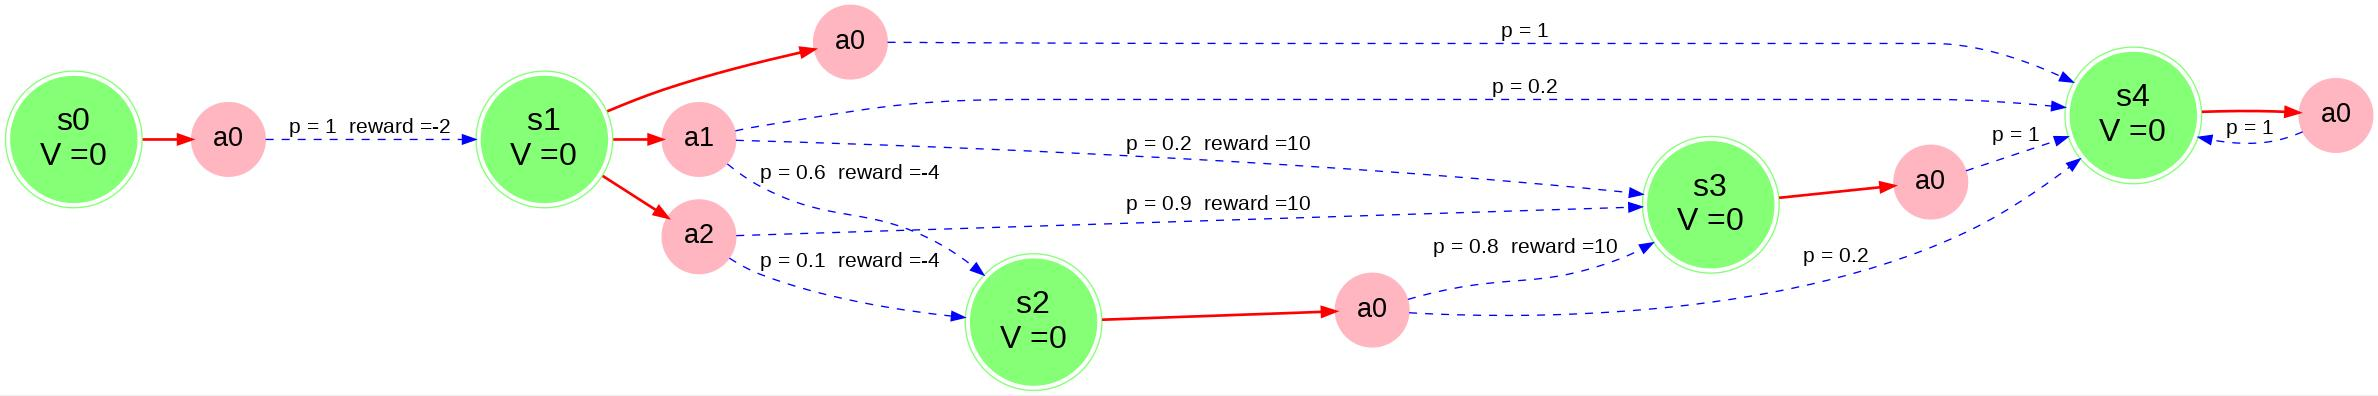

In [ ]:
# Parameters
gamma = 0.9  # discount for MDP
num_iter = 100  # maximum iterations, excluding initialization
# Stop VI if new values are this close to old values (or closer)
min_difference = 0.001

# Initialize V(s)
state_values = {s: 0 for s in mdp.get_all_states()}

display_jpeg(MDP.plot_graph_with_state_values(mdp, state_values))

Здесь нет никакого "текущего состояния"! Добавим матрицу состояний и построим новый граф:

In [ ]:
clear_output()

for i in range(num_iter):
    # Compute new state values using the functions you defined above.
    # It must be a dict {state : float V_new(state)}

    new_state_values = {}
    for s in state_values.keys():
        new_state_values[s] = get_new_state_value(mdp, state_values, s, gamma)

    # Compute difference
    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
    print("iter %4i   |   diff: %6.5f   |   " % (i, diff), end="")
    print("   ".join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values

    if diff < min_difference:
        print("Terminated")
        break

iter    0   |   diff: 8.60000   |   V(s0) = 0.000   V(s1) = 0.000   V(s2) = 0.000   V(s3) = 0.000   V(s4) = 0.000
iter    1   |   diff: 7.74000   |   V(s0) = -2.000   V(s1) = 8.600   V(s2) = 8.000   V(s3) = 0.000   V(s4) = 0.000
iter    2   |   diff: 0.64800   |   V(s0) = 5.740   V(s1) = 9.320   V(s2) = 8.000   V(s3) = 0.000   V(s4) = 0.000
iter    3   |   diff: 0.00000   |   V(s0) = 6.388   V(s1) = 9.320   V(s2) = 8.000   V(s3) = 0.000   V(s4) = 0.000
Terminated


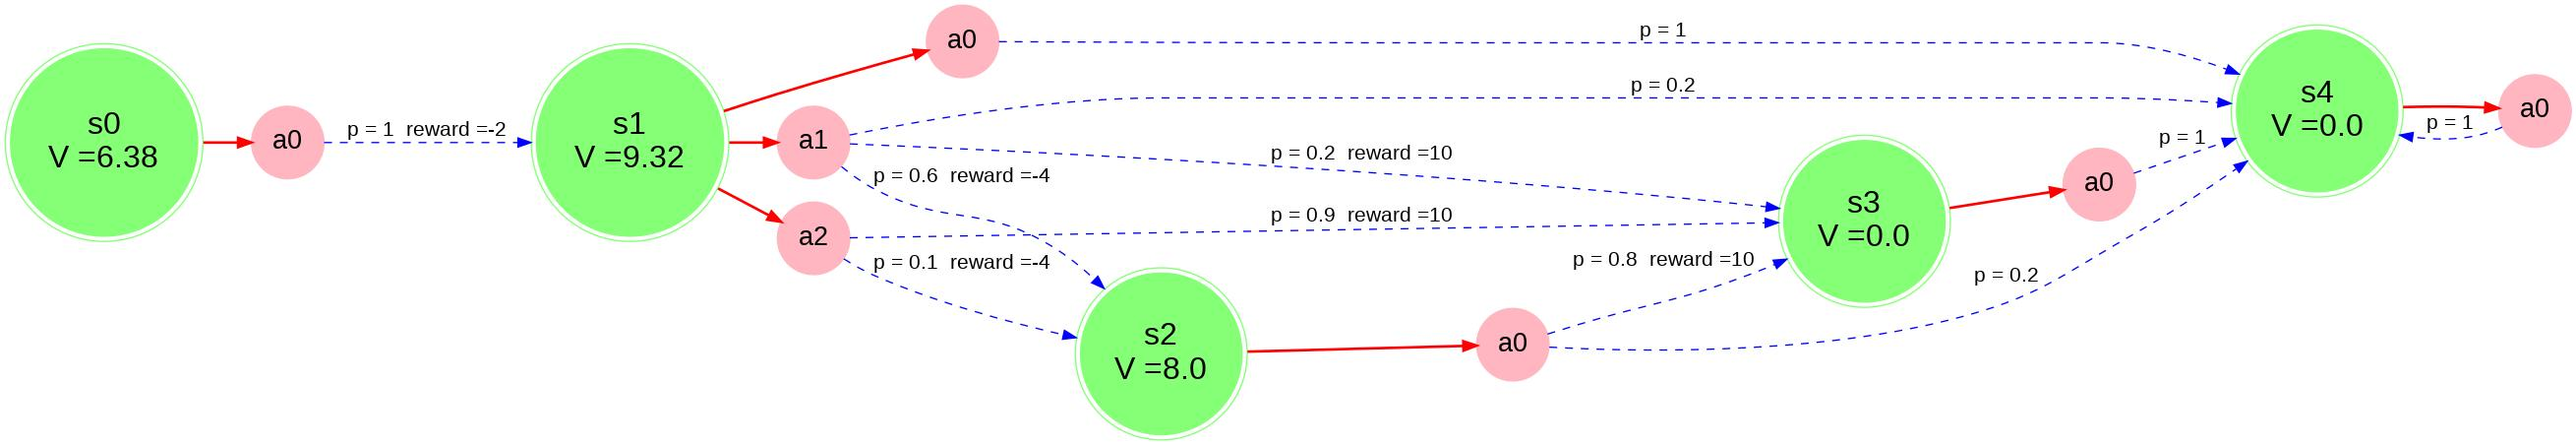

In [ ]:
display_jpeg(MDP.plot_graph_with_state_values(mdp, state_values))

Теперь воспользуемся этим $V^{*}(s)$, чтобы найти оптимальные действия в каждом состоянии:

 $$\pi^*(s) = \text{argmax}_a \sum_{s'} P_{ss'}^a \cdot [ R_{ss'}^a + \gamma V_{i}(s')] = \text{argmax}_a Q_i(s,a)$$

Единственное отличие от $V(s)$ в том, что здесь мы берем не $\max$, а $\text{argmax}$: найти действие с максимальным $Q(s,a)$.

In [ ]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
    """Finds optimal action using formula above."""
    if mdp.is_terminal(state):
        return None

    best_action = None
    q_max = float("-inf")
    actions = mdp.get_possible_actions(state)
    for a in actions:
        q = get_action_value(mdp, state_values, state, a, gamma)
        if q > q_max:
            best_action = a
            q_max = q

    return best_action


clear_output()

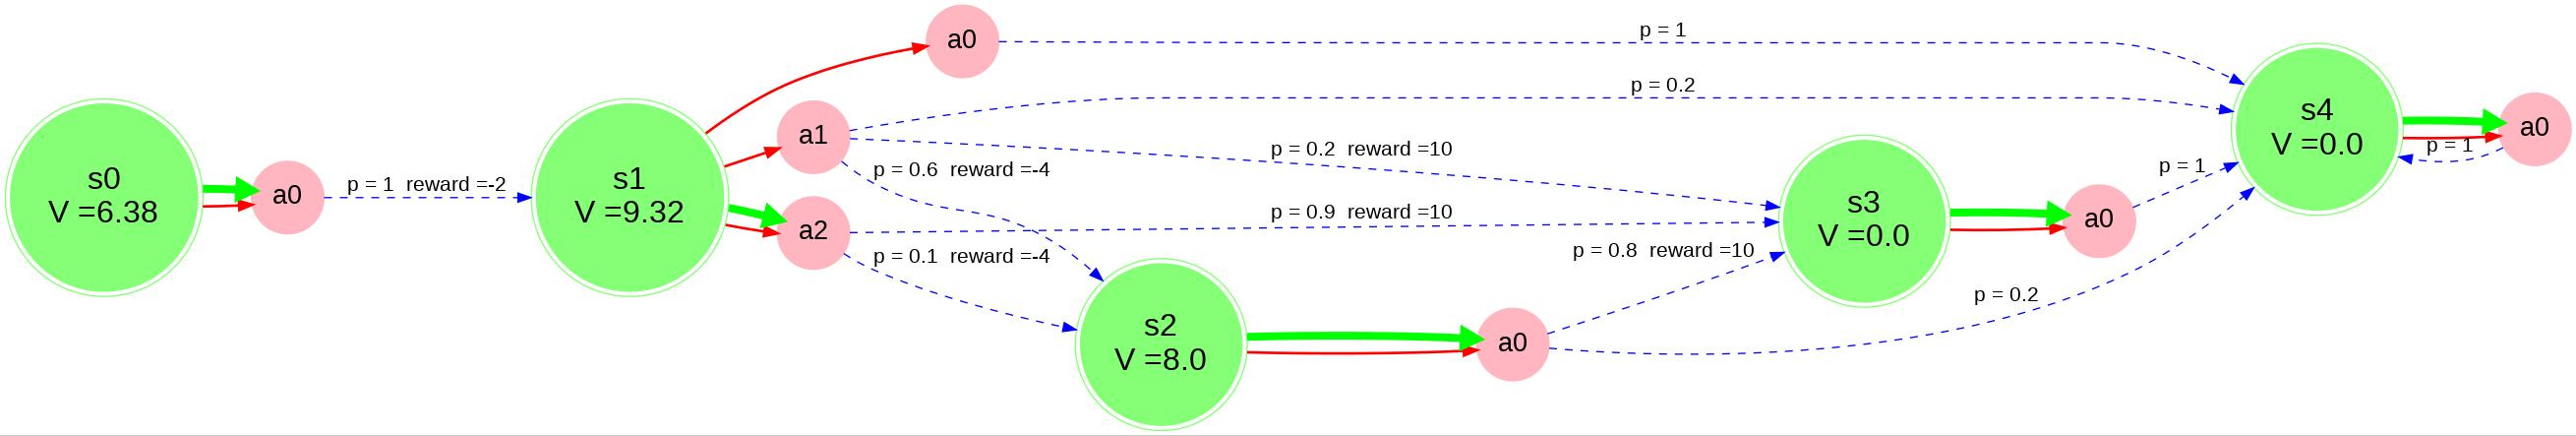

In [ ]:
display_jpeg(
    MDP.plot_graph_optimal_strategy_and_state_values(
        mdp, state_values, get_action_value
    )
)

In [ ]:
import numpy as np

# Measure agent's average reward

s = mdp.reset()
rewards = []
for _ in range(10000):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)

clear_output()
print("average reward: ", np.mean(rewards))

average reward:  0.0008


### Temporal difference (TD)-обучение (TD-learning)

Итак, в тех случаях, когда известна вероятность $P_{ss'}^a$, задача обучения может быть решена с помощью методов динамического программирования, как было рассмотрено выше. В реальных же задачах динамика среды зачастую неизвестна. Два главных подхода, позволяющие обходить незнание динамики среды, включают __метод Монте Карло__ (MC) и  __temporal difference (TD)-обучение__ (TD-learning). Оба эти подхода основываются на симулировании опыта взаимодействия со средой в виде __траекторий__ (MDP trajectory).

**MDP trajectory**

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/q_learning_scheme.png" alt="Drawing" width="500"/>

Траектория представляет из себя последовательность

• states ($s$)
• actions ($a$)
• rewards ($r$)

При этом MC оперирует полными траекториями, оканчивающимися в терминальном состоянии, а TD-learning позволяет учиться на неполных эпизодах, не дожидаясь конечного состояния.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/TD_MC_DP_backups_.png" alt="Drawing" width="900"/>

Рассмотрим второй подход подробнее.

**TD-learning** — один из наиболее мощных подходов, используемых во многих алгоритмах RL. Смысл в том, чтобы **обновлять оценки ценности** (состояния или действия) на **основе уже обученных оценок** для последующих состояний. Эту процедуру можно представить как "подтягивание" значения функции ценности того состояния, в котором мы находились на предыдущем шаге, к значению функции ценности того состояния, в котором мы находимся сейчас. Каким образом это можно сделать?

Базовый алгоритм TD-обучения — $TD(0)$ — заключается в следующем:

Инициализируем функцию ценности, например, $V(s)$, и стратегию $\pi$. Пусть у нас есть текущее состояние $s$, из которого мы:
- выбираем действие $a$ по стратегии $\pi$,
- совершаем действие $a$, наблюдаем награду $r$ и следующее состояние $s'$,
- обновляем оценку $V(s)$:

$$V(s) := V(s) + \alpha(\underbrace{\overbrace{r+\gamma V(s')}^{\text{TD target}} - \overbrace{V(s)}^{\text{old estimate}}}_{\text{TD error}}),$$

- переходим к следующему шагу $s:=s'$.

При оптимальной политике $\pi$:
$$\overbrace{r+\gamma V(s')}^{\text{TD target}} = \overbrace{V(s)}^{\text{old estimate}}$$

Cоответственно, их разницу, называемую _TD-ошибкой_ (TD-error), мы и будем пытаться минимизировать.

Почему это работает? Ведь мы обучаем случайно инициализированную оценку $V(s)$ на основе других оценок $V(s')$, которые также были инициализированы случайно. Дело в том, что состояния, которые предшествуют получению реальных наград (например, за победу), будут обучаться первыми и затем распространять свою ценность на состояния, предшествующие им.

Стоит отметить также, что TD-обучение не обязательно всегда будет смотреть на один шаг вперед. Алгоритм, называемый $TD(\lambda)$, будет обновлять оценки функции ценности сразу на несколько шагов назад.

Разновидностями TD-обучения являются алгоритмы __Q-learning__ и __SARSA__.

#### Q-Learning

Матрица перехода $P_{ss'}^{a}$ может быть нам неизвестна явно, что затруднит прямое применение алгоритма динамического программирования для нахождения функций Q или V в общем случае:

$$
\large q_{\pi}(s, a) = \sum_{s'}P_{ss'}^{a}(R_{ss'}^{a}+\gamma\sum_{a'}\pi(a'|s') q_{\pi}(s', a')) = \mathbb{E}(R_{ss'}^a +\gamma \mathbb{E}_{\pi} q_{\pi}(s', a')).
$$

Мы можем обойти это ограничение, заменив "честное" матожидание по MDP на выборочное среднее от серии наблюдений вдоль различных траекторий процесса:

$$
\large q_{\pi}(s, a) =  \frac{1}{N}\sum_n(R_{ss'}^a +\gamma \mathbb{E}_{\pi} q_{\pi}(s', a')).
$$


Допустим, мы ходим по полю размером 12×4. Наша цель — попасть в ячейку (3, 11).
**Максимизируя сумму будущих наград**, мы также находим **самый быстрый путь** к цели, поэтому наша цель сейчас — найти способ сделать это!


<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/q_learning_field.png" alt="Drawing" width="700"/></center>

<center><em>Source: <a href="https://habr.com/ru/articles/443240/">Понимание Q-learning, проблема «Прогулка по скале»</a></em></center>

Начнем с построения таблицы, которая измеряет, насколько хорошо будет выполнить определенное действие в любом состоянии (чем больше значение, тем лучше действие).

* Таблица будет иметь одну строку для каждого состояния и один столбец для каждого действия. Сетка имеет 48 (4 по Y на 12 по X) состояний, и разрешены 4 действия ($\leftarrow \downarrow \rightarrow \uparrow$), поэтому таблица будет 48×4.
* **Значения**, хранящиеся **в этой таблице**, называются **«Q-values»**.
* Это оценки суммы будущих наград. Другими словами, они оценивают, сколько еще вознаграждения мы можем получить до конца игры, находясь в состоянии $s$ и выполняя действие $a$.
* Мы инициализируем таблицу случайными значениями (или некоторой константой, например, всеми нулями).

Оптимальная «Q-table» имеет значения, которые позволяют нам предпринимать лучшие действия в каждом состоянии, давая нам в итоге лучший путь к победе.



<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/q_table.png" alt="Drawing" width="300"/></center>

<center><em>Source: <a href="https://habr.com/ru/articles/443240/">Понимание Q-learning, проблема «Прогулка по скале»</a></em></center>

**Q-learning** — это алгоритм, который «изучает» эти значения. На каждом шагу мы получаем больше информации о мире. Эта информация используется для обновления значений в таблице.


<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/q_learning.gif" alt="Drawing" width="800"></center>

<center><em>Source: <a href="https://habr.com/ru/articles/443240/">Понимание Q-learning, проблема «Прогулка по скале»</a></em></center>

Итак, мы не знаем вероятности переходов. Мы можем только генерировать траектории и учиться на них.




<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/q_learning_scheme.png" alt="Drawing" width="500"/>

Возникает вопрос: какую из функций ценности нам лучше пытаться учить: $V(s)$ или $Q(s,a)$? Поскольку $V(s)$ не позволит определять политику без знания $P_{ss'}^a$, будет выгоднее учить $Q(s,a)$.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/q_learning_possible_actions.png" alt="Drawing" width="600"/>

Инициализировать таблицу $Q(s, a)$ нулями.

* Цикл:
   * Семплировать $<s, a, r, s^{'}>$ из среды
   * Вычислить $\hat{Q}(s, a) = r(s,a) + \gamma Q(s^{'}, a_{i})$
   * Обновить $Q(s,a) \longleftarrow \alpha \hat{Q}(s, a) + (1-\alpha)Q(s,a)$

$\color{red}\triangle$ Мы хотим **несмещённую оценку с меньшей дисперисей**, поэтому используем **скользящее среднее**.

$\color{red}\triangle$ **Пересчёт** функции (поле в таблице) выполняется **после перехода**.

$\hat{Q}$ — расчетное значение, $Q$ — то, что было в таблице, $\alpha$ — шаг обучения.

Данный алгоритм называется __Q-learning__. Он напрямую аппроксимирует функцию $q_*(s,a)$, которая фактически представляет оптимальную политику $\pi_*$. В данном алгоритме оценка $Q(s, a)$ обновляется в соответствии с правилами TD-обучения:

$$\large Q(s,a) := Q(s,a) + \alpha(R_{ss'}^a+\gamma\max_{a'}Q(s',a') -Q(s,a))$$

Видно, что за счет максимума Q-learning будет аппроксимировать именно $q_*(s,a)$, независимо от того, какой политики мы придерживаемся (которая может быть, например, $\varepsilon$-жадной). Наш вариант Q-learning не учитывает того, что мы хотим иногда "рандомить". В совокупности группа методов, при которых мы можем придерживаться абсолютно любой стратегии, а обучаться все равно будут правильные оптимальные значения политики, называется __off-policy__.

#### Deep Q-Learning

Есть задачи, где количество состояний и переходов огромно, и поддерживать таблицу значений не представляется возможным.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/large_num_of_states.png" width="350"/><center>

<center><em>Иллюстрация игры Space Invaders</em></center>

Количество состояний для $8$-мибитной цветной ($3$ RGB-канала) игры Space Invaders с размером игрового поля $210 \times 160$ пикселей:

$$\large |S| = 210\times160\times2^{8\times3}$$

В таких ситуациях Q-функцию не считают в явном виде, а аппроксимируют нейросетью.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/approximately_q_function_by_network.png" alt="Drawing" width="800"/>

Чтобы считать градиент, приходится принимать значение Q-функции фиксированным и не зависящим от параметров нашей нейросети. Что, конечно, не так.


### Loss

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/deep_q_learning_loss.png" alt="Drawing" width="500"/>

### Approximate Q-learning

Q-values:
$$
\large \hat{Q}\left(s_{t}, a_{t}\right)=r+\gamma \cdot \max _{a^{\prime}} Q\left(s_{t+1}, a^{\prime}\right)
$$
Objective:
$$
\large L=\left(Q\left(s_{t}, a_{t}\right)-\left[r+\gamma \cdot \max _{a^{\prime}} Q\left(s_{t+1}, a^{\prime}\right)\right]\right)^{2}
$$
Gradient step:
$$
\large w_{t+1}=w_{t}-\alpha \cdot \frac{\delta L}{\delta w}
$$

### Алгоритм обучения

**Basic deep Q-learning**

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/basic_deep_q_learning_scheme.png" alt="Drawing" width="800"/>

$\varepsilon$-greedy нужна для исследования среды.

### Experience replay

**Проблема**:

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/information_about_states_is_unevenly_distributed.png" alt="Drawing" width="550"/></center>

В большинстве окружений информация, получаемая агентом, распределена не независимо. Т.е. последовательные наблюдения агента сильно коррелированы между собой (что понятно из интуитивных соображений, т.к. большинство окружений, в которых применяется RL, предполагают, что все изменения в них последовательны).

Мы можем столкнуться с такой проблемой при обучении нейросети, если в игре есть большое количество стандартных персонажей и редко встречающиеся "боссы". После повторения большого количества типовых действий нейросеть будет забывать, как проходить боссов.

Корреляция примеров ухудшает сходимость стохастического градиентного спуска. Таким образом, нам нужен способ, который позволяет улучшить распределение примеров для обучения (устранить или снизить корреляцию между ними).

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/experience_replay_scheme.png" width="600"/></center>

**Идея**: сохранять несколько предыдущих взаимодействий $<s,a,r,s^{'}>$.

Обучать на случайных подвыборках.

**Процесс обучения**:
* Сыграть 1 шаг и записать его
* Выбрать $N$ случайных записей для обучения

**Profit**: не требуется заново возвращаться в те же пары *состояние-действие* $(s,a)$, чтобы выучить их.
* Можно получить хорошую стратегию, сделав меньше взаимодействий со средой
* Боремся с катастрофическим забыванием данных

$\color{red}\triangle$ **Работает только с алгоритмами без политик.**

Обычно используется метод **проигрывания опыта (experience replay)**. Суть этого метода в том, что мы сохраняем некоторое количество примеров (состояние, действия, вознаграждение) в специальном буфере и для обучения выбираем случайные мини-батчи из этого буфера.

Так же **experience replay** позволяет агенту эффективнее использовать свой прошлый опыт.

### Target network

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/DQN-Loss_.png" alt="Drawing" width="800"/>

В DQN для эффективного обучения должны использоваться две сети: одна непосредственно обучается, другая определяет цель (TD target). Почему мы не можем пользоваться одной и той же сетью для получения оценки текущего $Q(s', a')$ и предыдущего $Q(s, a)$ состояний?

Напомним, что в процессе TD-обучения мы "подтягиваем" значение функции ценности того состояния, в котором мы находились на предыдущем шаге, к значению функции ценности того состояния, в котором мы находимся сейчас, а в DQN мы делаем это с помощью нейронной сети, и если использовать одну и ту же сеть для оценки $Q(s', a')$ и $Q(s, a)$, то этот процесс может превратиться в нескончаемую погоню за целью, которую невозможно достичь, поскольку с каждым обновлением весов, приближающим нас к цели, одновременно сама цель будет удаляться от нас (как на рисунке ниже):

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/At_first_everything_look.png" alt="Drawing" width="600"/>

К счастью, эта проблема решаема: нужно сделать так, чтобы сеть обучалась некоторое время аппроксимировать оценку $\max_{a'} Q(s', a')$, полученную без использования обновленных весов Q-сети. Для этого используют __целевую сеть__ (target network) с зафиксированными весами, обновляемыми раз в несколько эпизодов обучения (например, эпох или игровых эпизодов, если обучение происходит после каждого игрового эпизода).

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.1/L15/out/Suppose_we_freeze.png" alt="Drawing" width="600"/>

Таким образом, параллельно будут существовать две сети, одна из которых будет отвечать за выбор действия, другая — за целевую функцию, одна из которых будет обучаться с отставанием.

## Пример c CartPole DQN

Сеть Deep Q = DQN (Deep Q-Network).

CartPole — перевернутый маятник с центром тяжести над своей точкой поворота. Он нестабилен, но его можно контролировать, перемещая точку поворота под центром масс. Цель состоит в том, чтобы сохранить равновесие, прикладывая соответствующие усилия к точке поворота.

Другой env можно использовать без каких-либо изменений кода. Пространство состояний должно быть единым вектором, действия должны быть дискретными.

CartPole — самый простой. На ее решение должно уйти несколько минут.

Для LunarLander может потребоваться 1–2 часа, чтобы получить 200 баллов (хороший балл) в Colab, и прогресс в обучении не выглядит информативным.

In [ ]:
import os
from IPython.display import clear_output

################################################
# For CartPole
################################################

# Source: https://github.com/yandexdataschool/Practical_RL/blob/master/setup_colab.sh
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/setup_colab.sh -O- | bash

# Source: https://github.com/yandexdataschool/Practical_RL/tree/master/week04_approx_rl/dqn/
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/utils.py
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/atari_wrappers.py
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.1/L15/replay_buffer.py

!pip install -q swig
!pip install -q gym[box2d]

!touch .setup_complete


# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ["DISPLAY"] = ":1"

clear_output()

In [ ]:
import gym

ENV_NAME = "CartPole-v1"


def make_env(seed=None):
    # Some envs are wrapped with a time limit wrapper by default
    env = gym.make(ENV_NAME, render_mode="rgb_array", new_step_api=True).unwrapped
    if seed is not None:
        env.seed(seed)
    return env

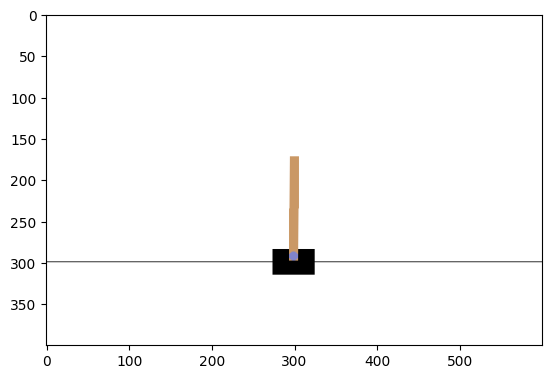

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


env = make_env()
env.reset()
env_img = np.squeeze(env.render())
clear_output()
plt.imshow(env_img)
state_shape, n_actions = env.observation_space.shape, env.action_space.n

### Архитектура сети

Теперь нам нужно построить нейронную сеть, которая может сопоставлять наблюдения с состоянием $q$-значений.

Модель не должна быть слишком сложной: 1–2 скрытых слоя с < 200 нейронами и активацией ReLU, вероятно, будет достаточно.

Batch Normalization и Dropout могут все испортить, поэтому их не используем.

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# those who have a GPU but feel unfair to use it can uncomment:
# device = torch.device('cpu')

print(state_shape)

(4,)


In [ ]:
from torch import nn


class DQNAgent(nn.Module):
    def __init__(self, state_shape, n_actions, epsilon=0):
        super().__init__()
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.state_shape = state_shape
        # Define your network body here. Please make sure agent is fully contained here
        assert len(state_shape) == 1
        state_dim = state_shape[0]

        # Define NN
        ##############################################
        hidden_size = 150
        self._nn = nn.Sequential(
            nn.Linear(state_dim, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_actions),
            nn.ReLU(),
        )
        ##############################################

    def forward(self, state_t):
        """
        takes agent's observation (tensor), returns qvalues (tensor)
        :param state_t: a batch states, shape = [batch_size, *state_dim=4]
        """
        # Use your network to compute qvalues for given state

        ##############################################
        qvalues = self._nn(state_t)
        ##############################################

        assert qvalues.requires_grad, "qvalues must be a torch tensor with grad"
        assert (
            len(qvalues.shape) == 2
            and qvalues.shape[0] == state_t.shape[0]
            and qvalues.shape[1] == n_actions
        )

        return qvalues

    def get_qvalues(self, states):
        """
        like forward, but works on numpy arrays, not tensors
        """
        model_device = next(self.parameters()).device
        states = torch.tensor(states, device=model_device, dtype=torch.float32)
        qvalues = self.forward(states)
        return qvalues.data.cpu().numpy()

    def sample_actions(self, qvalues):
        """pick actions given qvalues. Uses epsilon-greedy exploration strategy."""
        epsilon = self.epsilon
        batch_size, n_actions = qvalues.shape

        random_actions = np.random.choice(n_actions, size=batch_size)
        best_actions = qvalues.argmax(axis=-1)

        should_explore = np.random.choice([0, 1], batch_size, p=[1 - epsilon, epsilon])
        return np.where(should_explore, random_actions, best_actions)


clear_output()

In [ ]:
agent = DQNAgent(state_shape, n_actions, epsilon=0.5).to(device)

In [ ]:
def evaluate(env, agent, n_games=1, greedy=False, t_max=10000):
    """Plays n_games full games. If greedy, picks actions as argmax(qvalues). Returns mean reward."""
    rewards = []
    for _ in range(n_games):
        s = env.reset()
        reward = 0
        for _ in range(t_max):
            qvalues = agent.get_qvalues([s])
            action = (
                qvalues.argmax(axis=-1)[0]
                if greedy
                else agent.sample_actions(qvalues)[0]
            )
            s, r, done, _, _ = env.step(action)
            reward += r
            if done:
                break

        rewards.append(reward)
    return np.mean(rewards)

### Experience Replay Buffer and Target Networks

**Интерфейс довольно прост:**

* `exp_replay.add(obs, act, rw, next_obs, done)` — сохраняет $(s,a,r,s',d\text{one})$ кортеж в буфер,
* `exp_replay.sample(batch_size)` — возвращает observations, actions, rewards, next observations и `is_done` для `batch_size` random samples,
* `len(exp_replay)` — возвращает количество элементов, хранящихся в `ReplayBuffer`.

In [ ]:
from replay_buffer import ReplayBuffer

exp_replay = ReplayBuffer(2000)


target_network = DQNAgent(agent.state_shape, agent.n_actions, epsilon=0.5).to(device)
# This is how you can load weights from agent into target network
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

### TD-Loss

Вычислим ошибку TD Q-learning:

$$ \large L = { 1 \over N} \sum_i [ Q_{\theta}(s,a) - Q_\text{reference}(s,a) ] ^2 $$

С Q-reference, определенным как:

$$ \large Q_\text{reference}(s,a) = r(s,a) + \gamma \cdot \max_{a'} Q_\text{target}(s', a'), $$

где:
* $Q_\text{target}(s',a')$ обозначает $Q$-значение следующего предсказанного состояния и следующего действия __`target_network`__,
* $s, a, r, s'$ — текущее состояние, действие, вознаграждение и следующее состояние соответственно,
* $\gamma$ является коэффициентом дисконтирования, определенным двумя ячейками выше.

In [ ]:
def compute_td_loss(
    states,
    actions,
    rewards,
    next_states,
    is_done,
    agent,
    target_network,
    gamma=0.99,
    check_shapes=False,
    device=device,
):
    """Compute td loss using torch operations only. Use the formulae above."""
    states = torch.tensor(
        states, device=device, dtype=torch.float32
    )  # shape: [batch_size, *state_shape]
    actions = torch.tensor(
        actions, device=device, dtype=torch.int64
    )  # shape: [batch_size]
    rewards = torch.tensor(
        rewards, device=device, dtype=torch.float32
    )  # shape: [batch_size]
    # shape: [batch_size, *state_shape]
    next_states = torch.tensor(next_states, device=device, dtype=torch.float)
    is_done = torch.tensor(
        is_done.astype("float32"),
        device=device,
        dtype=torch.float32,
    )  # shape: [batch_size]
    is_not_done = 1 - is_done

    # get q-values for all actions in current states
    predicted_qvalues = agent(states)  # shape: [batch_size, n_actions]

    # compute q-values for all actions in next states
    # with torch.no_grad():
    predicted_next_qvalues = target_network(
        next_states
    )  # shape: [batch_size, n_actions]

    # select q-values for chosen actions
    predicted_qvalues_for_actions = predicted_qvalues[
        range(len(actions)), actions
    ]  # shape: [batch_size]

    # compute V*(next_states) using predicted next q-values
    ##############################################
    next_state_values = predicted_next_qvalues.max(axis=-1)[0]
    ##############################################

    assert (
        next_state_values.dim() == 1 and next_state_values.shape[0] == states.shape[0]
    ), "must predict one value per state"

    # compute "target q-values" for loss - it's what's inside square parentheses in the above formula.
    # at the last state use the simplified formula: Q(s,a) = r(s,a) since s' doesn't exist
    # you can multiply next state values by is_not_done to achieve this.
    ###############################################
    target_qvalues_for_actions = rewards + gamma * next_state_values * is_not_done
    ##############################################

    # mean squared error loss to minimize
    loss = torch.mean(
        (predicted_qvalues_for_actions - target_qvalues_for_actions.detach()) ** 2
    )

    if check_shapes:
        assert (
            predicted_next_qvalues.data.dim() == 2
        ), "make sure you predicted q-values for all actions in next state"
        assert (
            next_state_values.data.dim() == 1
        ), "make sure you computed V(s') as maximum over just the actions axis and not all axes"
        assert (
            target_qvalues_for_actions.data.dim() == 1
        ), "there's something wrong with target q-values, they must be a vector"

    return loss

### Реализация алгоритма

In [ ]:
import random

seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

env = make_env()
env.reset(seed=seed)
state_dim = env.observation_space.shape
n_actions = env.action_space.n
state = env.reset()

agent = DQNAgent(state_dim, n_actions, epsilon=1).to(device)
target_network = DQNAgent(state_dim, n_actions, epsilon=1).to(device)
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

Используем экспоненциальное скользящее среднее для сглаживания графика TD loss:

In [ ]:
from scipy.signal import fftconvolve, gaussian


# Exponention Moving Average for plot smoothing
def smoothen(values):
    kernel = gaussian(100, std=100)
    # kernel = np.concatenate([np.arange(100), np.arange(99, -1, -1)])
    kernel = kernel / np.sum(kernel)
    return fftconvolve(values, kernel, "valid")

Один агент для игры, второй для обучения. Периодически веса обученного агента копируются в "игрока".

In [ ]:
def play_and_record(initial_state, agent, env, exp_replay, n_steps=1):
    """
    Play the game for exactly n_steps, record every (s,a,r,s', done) to replay buffer.
    Whenever game ends, add record with done=True and reset the game.
    It is guaranteed that env has done=False when passed to this function.

    PLEASE DO NOT RESET ENV UNLESS IT IS "DONE"

    :returns: return sum of rewards over time and the state in which the env stays

    hint: use agent.sample.actions
    """
    s = initial_state
    sum_rewards = 0

    # Play the game for n_steps as per instructions above
    for _ in range(n_steps):
        qvalues = agent.get_qvalues([s])

        action = agent.sample_actions(qvalues)[0]
        # action = action.argmax(axis=-1)[0]
        state, reward, done, _, _ = env.step(action)
        sum_rewards += reward

        exp_replay.add(s, action, reward, state, done)

        if done:
            state = env.reset()

        s = state

    return sum_rewards, s


clear_output()

In [ ]:
import utils


REPLAY_BUFFER_SIZE = 10**4

exp_replay = ReplayBuffer(REPLAY_BUFFER_SIZE)
for i in range(100):
    if not utils.is_enough_ram(min_available_gb=0.1):
        print(
            """
            Less than 100 Mb RAM available.
            Make sure the buffer size in not too huge.
            Also check, maybe other processes consume RAM heavily.
            """
        )
        break
    play_and_record(state, agent, env, exp_replay, n_steps=10**2)
    if len(exp_replay) == REPLAY_BUFFER_SIZE:
        break
clear_output()
print(len(exp_replay))

10000


In [ ]:
import time

timesteps_per_epoch = 1
batch_size = 32
total_steps = 4 * 10**4
decay_steps = 1 * 10**4

optimizer = torch.optim.Adam(agent.parameters(), lr=1e-4)

init_epsilon = 1
final_epsilon = 0.1

loss_freq = 20
refresh_target_network_freq = 100
eval_freq = 1000

max_grad_norm = 5000

mean_rw_history = []
td_loss_history = []
grad_norm_history = []
initial_state_v_history = []
step = 0


def wait_for_keyboard_interrupt():
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        pass

buffer size = 10000, epsilon = 0.10000


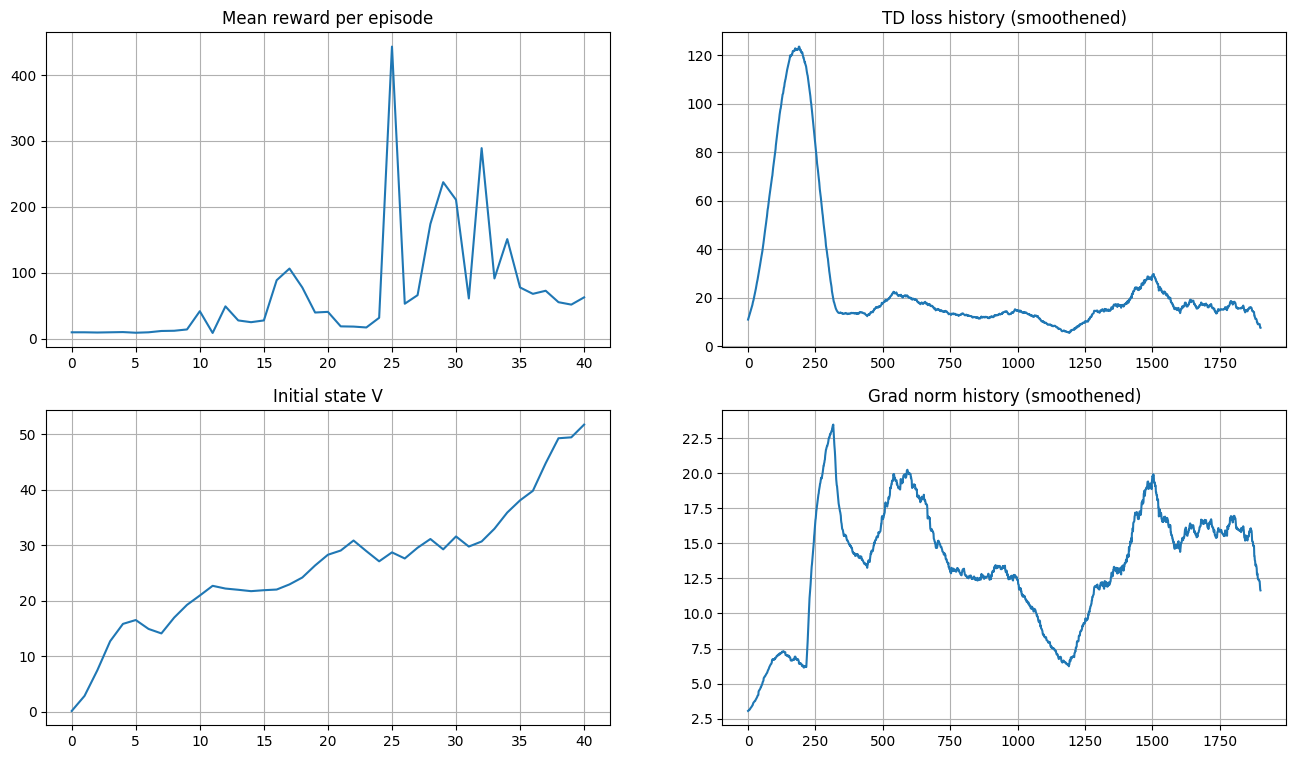

100%|██████████| 25744/25744 [03:34<00:00, 120.28it/s]


In [ ]:
from tqdm import trange

state = env.reset()

with trange(step, total_steps + 1) as progress_bar:
    for step in progress_bar:
        if not utils.is_enough_ram():
            print("less that 100 Mb RAM available, freezing")
            print("make sure everything is ok and use KeyboardInterrupt to continue")
            wait_for_keyboard_interrupt()

        agent.epsilon = utils.linear_decay(
            init_epsilon, final_epsilon, step, decay_steps
        )

        # play
        _, state = play_and_record(state, agent, env, exp_replay, timesteps_per_epoch)

        # train
        # sample batch_size of data from experience replay
        s, a, r, next_s, is_done = exp_replay.sample(batch_size)
        # loss = compute TD loss
        loss = compute_td_loss(s, a, r, next_s, is_done, agent, target_network)

        loss.backward()
        grad_norm = nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
        optimizer.step()
        optimizer.zero_grad()

        if step % loss_freq == 0:
            td_loss_history.append(loss.data.cpu().item())
            grad_norm_history.append(grad_norm.data.cpu().item())

        if step % refresh_target_network_freq == 0:
            # Load agent weights into target_network
            target_network.load_state_dict(agent.state_dict())

        if step % eval_freq == 0:
            mean_rw_history.append(
                evaluate(make_env(seed=step), agent, n_games=3, greedy=True, t_max=1000)
            )
            initial_state_q_values = agent.get_qvalues([make_env(seed=step).reset()])
            initial_state_v_history.append(np.max(initial_state_q_values))

            clear_output(True)
            print("buffer size = %i, epsilon = %.5f" % (len(exp_replay), agent.epsilon))

            plt.figure(figsize=[16, 9])

            plt.subplot(2, 2, 1)
            plt.title("Mean reward per episode")
            plt.plot(mean_rw_history)
            plt.grid()

            assert not np.isnan(td_loss_history[-1])
            plt.subplot(2, 2, 2)
            plt.title("TD loss history (smoothened)")
            plt.plot(smoothen(td_loss_history))
            plt.grid()

            plt.subplot(2, 2, 3)
            plt.title("Initial state V")
            plt.plot(initial_state_v_history)
            plt.grid()

            plt.subplot(2, 2, 4)
            plt.title("Grad norm history (smoothened)")
            plt.plot(smoothen(grad_norm_history))
            plt.grid()

            plt.show()

In [ ]:
final_score = evaluate(make_env(), agent, n_games=30, greedy=True, t_max=1000)
print("final score:", final_score)
if final_score > 300:
    print("Well done")
else:
    print("not good enough for DQN")

final score: 61.46666666666667
not good enough for DQN


<font size="6">Литература</font>

* [[arxiv] 🎓 Deep Reinforcement Learning for Autonomous Driving: A Survey](https://arxiv.org/abs/2002.00444)<br>
* [[arxiv] 🎓 Reinforcement Learning and Control as Probabilistic Inference: Tutorial and Review](https://arxiv.org/abs/1805.00909)<br>
* [[git] 🐾 Lecture notes and exercises for control theory course](https://github.com/DPritykin/Control-Theory-Course)
* [[article] 🎓 Reinforcement learning for combinatorial optimization: A survey](https://doi.org/10.1016/j.cor.2021.105400)<br>
* [[arxiv] 🎓 Neural Combinatorial Optimization with Reinforcement Learning](https://arxiv.org/abs/1611.09940)
* [[arxiv] 🎓 Mastering Chess and Shogi by Self-Play with a General Reinforcement Learning Algorithm](https://arxiv.org/abs/1712.01815) <br>
* [[blog] ✏️ AlphaGo](https://deepmind.google/technologies/alphago/)
* [[book] 📚 Reinforcement Learning for NLP](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/lectures/lecture16-guest.pdf)<br>
* [[arxiv] 🎓 Training language models to follow instructions with human feedback](https://arxiv.org/abs/2203.02155)
* [[doc] 🛠️ Gymnasium](https://gymnasium.farama.org/)

<font size="5">Дополнительно:</font>
* [[git] 🐾 A course in reinforcement learning in the wild](https://github.com/yandexdataschool/Practical_RL/tree/master)
* [[book] 📚 8.1. Обучение с подкреплением, Учебник по машинному обучению ШАД](https://education.yandex.ru/handbook/ml/article/obuchenie-s-podkrepleniem)
* [[course] 📚 UC Berkeley CS188 Intro to AI](http://ai.berkeley.edu/lecture_slides.html)
* [[course] 📚 Deep Reinforcement Learning](https://rail.eecs.berkeley.edu/deeprlcourse/)